# OBJECTIVE


The data is related with direct marketing campaigns (phone calls) of a Portugese Bank institution. The classification goal is to predict if the client will subscribve to a term deposit (y).

Domain Analysis
1. Introduction:
- The dataset provided is of a Portuguese bank. They are a banking institution. We aim to find whether a marketing campaign has helped them increase the number of people who have subscribed to a term deposit.

2. Data and Information:
- The data we have in our dataset is a mixture of categorical Data and Numerical data.

# FUNCTION

In [1]:
def outliers_iqr(df1,target_column):
    df=df1.drop(columns=target_column)
    outlier_free=df1.copy
    N_col=[]
    C_col=[]
    N_col = df.select_dtypes(include='number')
    C_col = df.select_dtypes(include='object')
    #outlier_columns=pd.dataframe({colmn_name:[],len_outliers:[],percentile:[]})
    outlier_columns = pd.DataFrame(columns=['column_name', 'len_outliers', 'percentile'])
    no_outlier_columns=[]
    z=1
    c=0
    for x in  N_col.columns:
        q1=df[x].quantile(0.25)
        q3=df[x].quantile(0.75)
        iqr=q3-q1
        print(x)
        outliers = df[(df[x] > q3 + (1.5 * iqr)) | (df[x] < q1 - (1.5 * iqr))]
        print(len(outliers))
        if len(outliers)==0:
            no_outlier_columns.append(x)
            pass
        else:
            print('upper_fence :' , q3 + (1.5 * iqr))
            print('lower_fence :'  ,q1 - (1.5 * iqr))
            print(outliers[x])
            outlier_columns.loc[len(outlier_columns)] = [x, len(outliers), ((len(outliers))/(len(df[x]))*100)]
            #outlier_columns[percentile].append((len(outliers))/(len(df[x]))*100)
            print('as of now the no of coumns is =',z)
            c=c+len(outliers)
            print('as of now the total no of outlier is =',c)
            z+=1
            indices_to_drop = outliers.index.intersection(df1.index)
            df1 = df1.drop(indices_to_drop)

            
            
        print('******************************************')
        outlier_free=df1.copy()
    s=outlier_columns
    d=no_outlier_columns
    #print('columns with outliers are :',outlier_columns)
    #print('columns without outliers are :',no_outlier_columns)
    # ex; out_colmns,no.out_columns=outliers_iqr(data)
    outlier_columns.sort_values('len_outliers').plot(kind='barh', figsize=(14, 40), x='column_name', y='len_outliers')
    plt.xlabel('Number of outliers')
    plt.show()
    return outlier_columns,no_outlier_columns,outlier_free





# IMPORTING

## Importing Libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings as wn
wn.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import plotly.express as px

## Importing the Data

In [3]:
data=pd.read_csv(r"C:\Users\ALTRIN JINO\OneDrive\Desktop\Project\data\bank-additional-full.csv",sep=';')

In [4]:

data.rename(columns={'loan':'personal_loan','contact':'communication_means','month':'communication_month','day_of_week':'communication_day','fduration_of_call':'duration_of_call','pdays':'last_contacted','previous':'how_many_times_contacted','poutcome':'last_call_outcome','Result(y)':'Result (y)','emp.var.rate':'emp_var_rate'},inplace=True)

In [5]:
data.head(3)

age        job  marital    education  default housing personal_loan  \
0   56  housemaid  married     basic.4y       no      no            no   
1   57   services  married  high.school  unknown      no            no   
2   37   services  married  high.school       no     yes            no   

  communication_means communication_month communication_day  duration  \
0           telephone                 may               mon       261   
1           telephone                 may               mon       149   
2           telephone                 may               mon       226   

   campaign  last_contacted  how_many_times_contacted last_call_outcome  \
0         1             999                         0       nonexistent   
1         1             999                         0       nonexistent   
2         1             999                         0       nonexistent   

   emp_var_rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no

# General info about the Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       41188 non-null  int64  
 1   job                       41188 non-null  object 
 2   marital                   41188 non-null  object 
 3   education                 41188 non-null  object 
 4   default                   41188 non-null  object 
 5   housing                   41188 non-null  object 
 6   personal_loan             41188 non-null  object 
 7   communication_means       41188 non-null  object 
 8   communication_month       41188 non-null  object 
 9   communication_day         41188 non-null  object 
 10  duration                  41188 non-null  int64  
 11  campaign                  41188 non-null  int64  
 12  last_contacted            41188 non-null  int64  
 13  how_many_times_contacted  41188 non-null  int64  
 14  last_c

- The above data contains 21 columns , none of them containg any null values. There are 5 columns containing float values, 5 columns containing 
integer values whereas 11 columns contain categorical values.

- Here the input variables (independent features) are  :'age', 'job', 'marital',    'education', 'default', 'housing', 'personal_loan', 'communication_means', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'.
- whereas the output(target variable ) is                : 'y'.
- The target variable indicates whether the client has subscribed to a term deposit, with 'yes' indicating subscription and 'no' indicating non-subscription.

In [7]:
data.describe()

age      duration      campaign  last_contacted  \
count  41188.00000  41188.000000  41188.000000    41188.000000   
mean      40.02406    258.285010      2.567593      962.475454   
std       10.42125    259.279249      2.770014      186.910907   
min       17.00000      0.000000      1.000000        0.000000   
25%       32.00000    102.000000      1.000000      999.000000   
50%       38.00000    180.000000      2.000000      999.000000   
75%       47.00000    319.000000      3.000000      999.000000   
max       98.00000   4918.000000     56.000000      999.000000   

       how_many_times_contacted  emp_var_rate  cons.price.idx  cons.conf.idx  \
count              41188.000000  41188.000000    41188.000000   41188.000000   
mean                   0.172963      0.081886       93.575664     -40.502600   
std                    0.494901      1.570960        0.578840       4.628198   
min                    0.000000     -3.400000       92.201000     -50.800000   
25%                    0.000000     -1.800000       93.075000     -42.700000   
50%                    0.000000      1.100000       93.749000     -41.800000   
75%                    0.000000      1.400000       93.994000     -36.400000   
max                    7.000000      1.400000       94.767000     -26.900000   

          euribor3m   nr.employed  
count  41188.000000  41188.000000  
mean       3.621291   5167.035911  
std        1.734447     72.251528  
min        0.634000   4963.600000  
25%        1.344000   5099.100000  
50%        4.857000   5191.000000  
75%        4.961000   5228.100000  
max        5.045000   5228.100000

- The dataset contains 41188 values 
- The details of the customer range between the ages 17 and 98 where the distribution is right skewed (median =38)
- The average emount of time spent on a call is about 258 seconds
- Most of the clients were contacted only a few times during the campaign where majority of them were **not** contacted before this campaign
- A stable employment variation and consumer price index can be witnessed during the campaign.
- The interest rate indicator also seems to be steady during the term


In [8]:
data.describe(include='O')

job  marital          education default housing personal_loan  \
count    41188    41188              41188   41188   41188         41188   
unique      12        4                  8       3       3             3   
top     admin.  married  university.degree      no     yes            no   
freq     10422    24928              12168   32588   21576         33950   

       communication_means communication_month communication_day  \
count                41188               41188             41188   
unique                   2                  10                 5   
top               cellular                 may               thu   
freq                 26144               13769              8623   

       last_call_outcome      y  
count              41188  41188  
unique                 3      2  
top          nonexistent     no  
freq               35563  36548

- the top noted clients are who have an administrative related jobs, married. hold a university degree , have default,have housing personal_loan but no personal loans. 

In [9]:
data.isnull().sum()

age                         0
job                         0
marital                     0
education                   0
default                     0
housing                     0
personal_loan               0
communication_means         0
communication_month         0
communication_day           0
duration                    0
campaign                    0
last_contacted              0
how_many_times_contacted    0
last_call_outcome           0
emp_var_rate                0
cons.price.idx              0
cons.conf.idx               0
euribor3m                   0
nr.employed                 0
y                           0
dtype: int64

- no null values are found

In [10]:
data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

- it is an imbalanced dataset (classification problem)

In [11]:
data.nunique()

age                           78
job                           12
marital                        4
education                      8
default                        3
housing                        3
personal_loan                  3
communication_means            2
communication_month           10
communication_day              5
duration                    1544
campaign                      42
last_contacted                27
how_many_times_contacted       8
last_call_outcome              3
emp_var_rate                  10
cons.price.idx                26
cons.conf.idx                 26
euribor3m                    316
nr.employed                   11
y                              2
dtype: int64

In [12]:
discrete=[]
continuous=[]
for i in data.iloc[:,1:]:
    if(data[i].nunique()>9):
        continuous.append(i)
    else:
        discrete.append(i)

# Exploratory Data Analysis

## Univariant Analysis

                                             |                                             | [  0%]   00:00 ->…


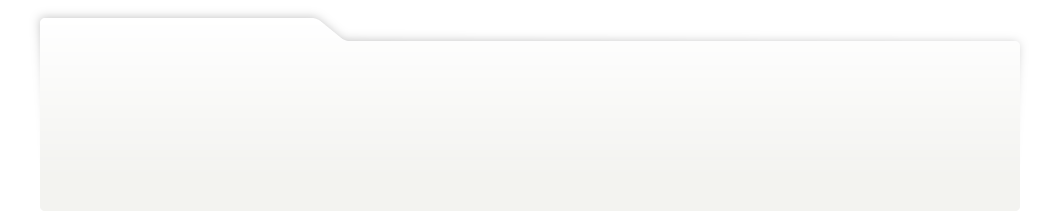
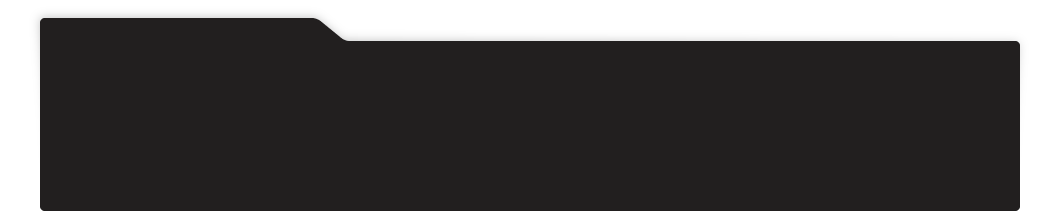
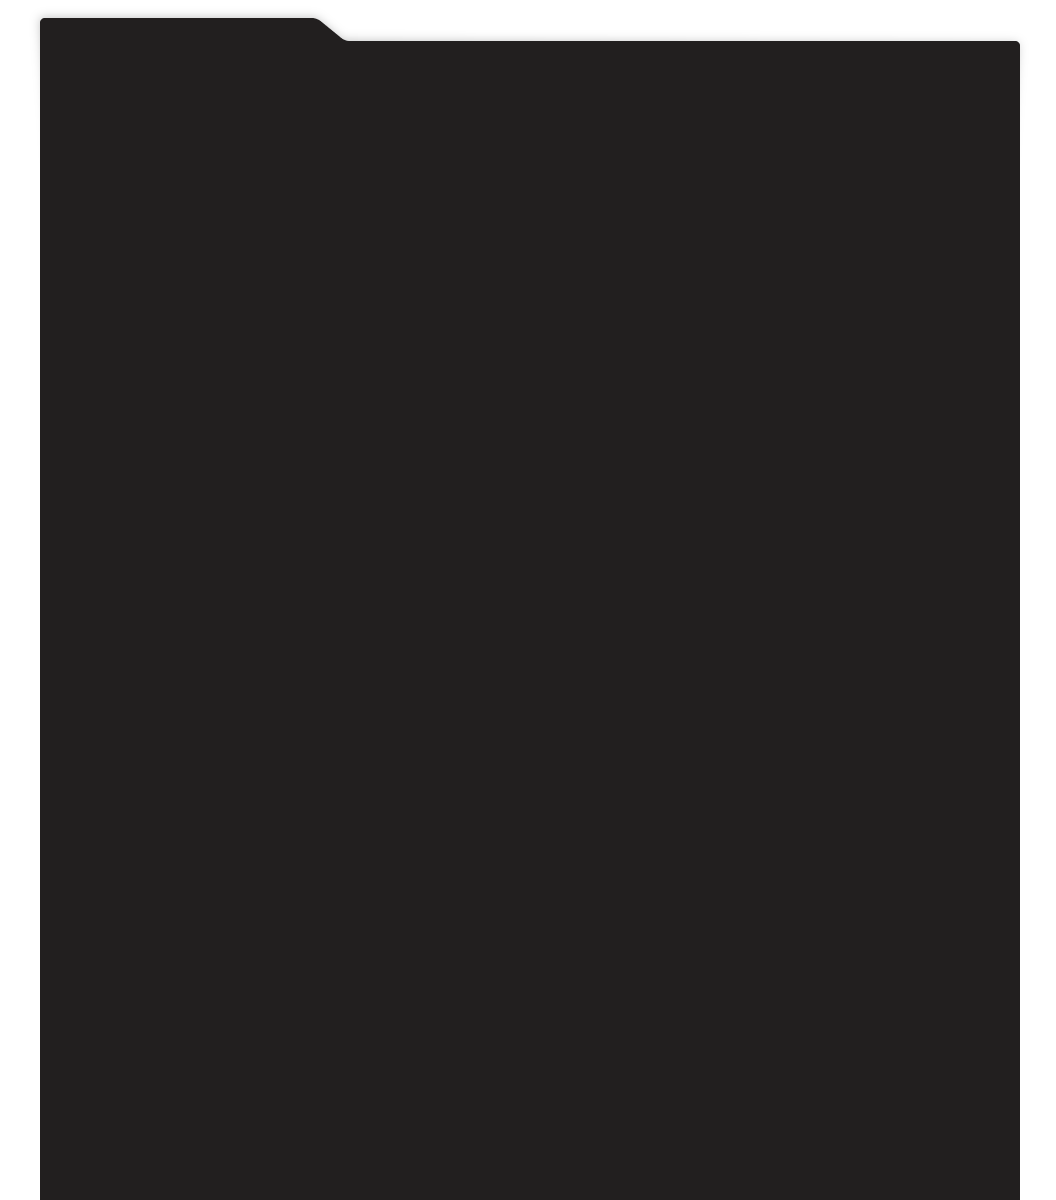
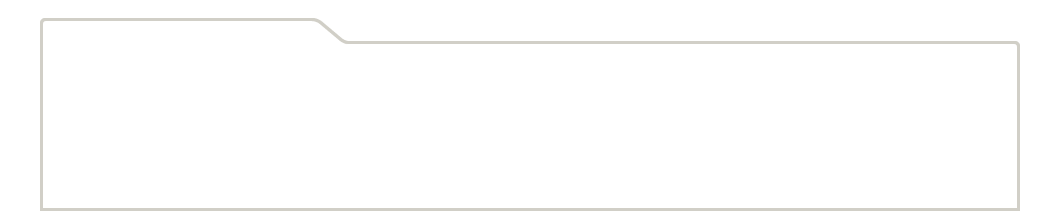
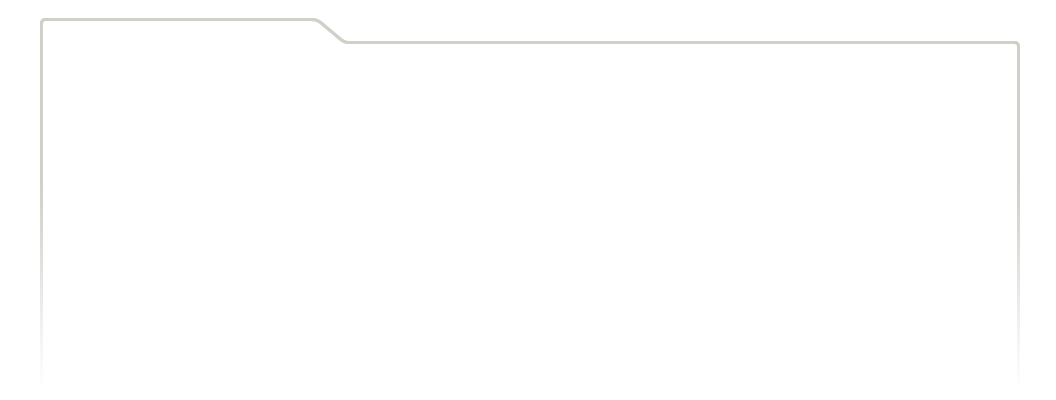
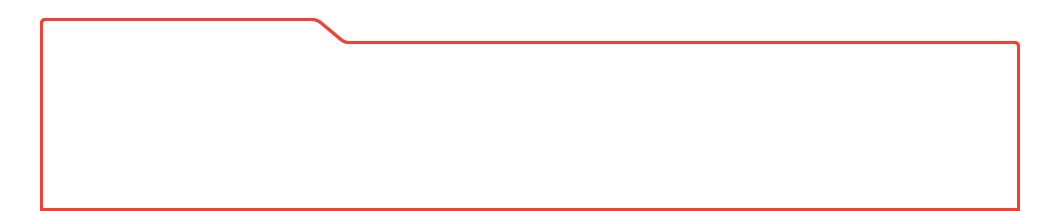
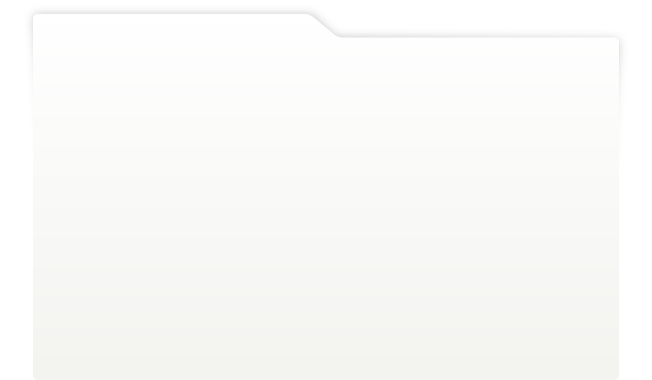
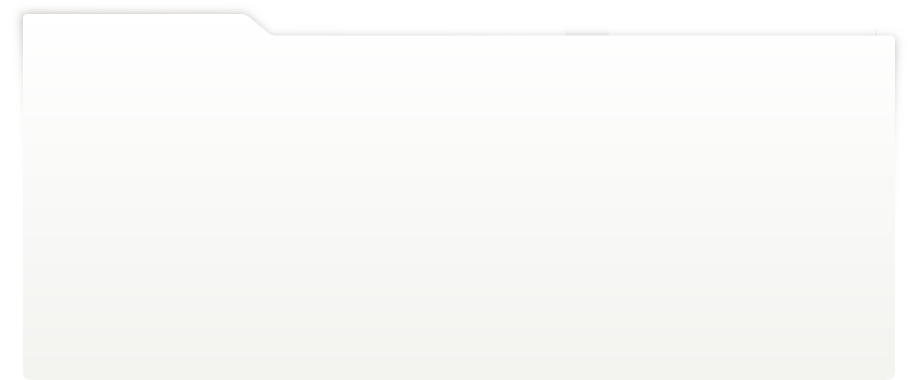
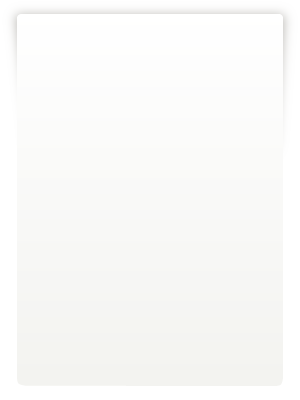
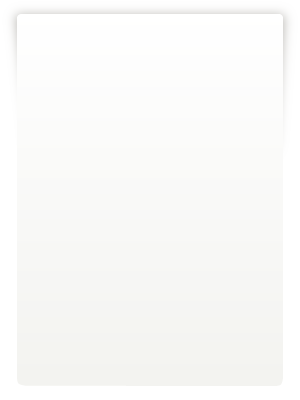
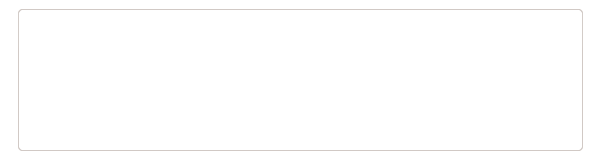
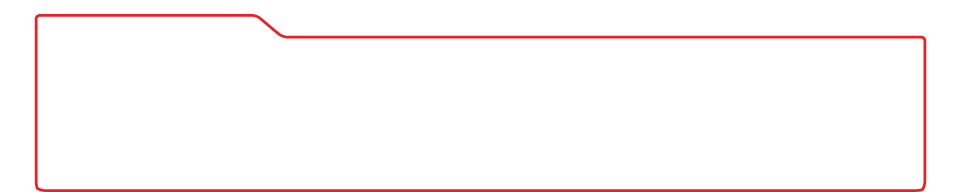
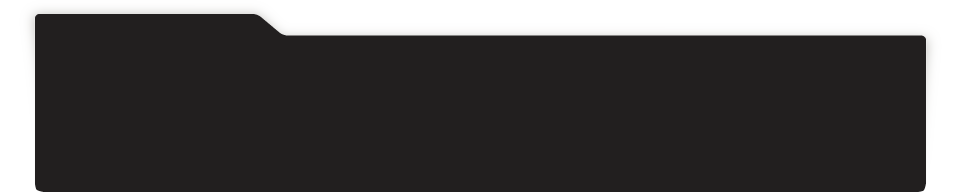
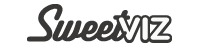
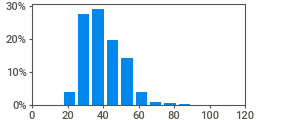
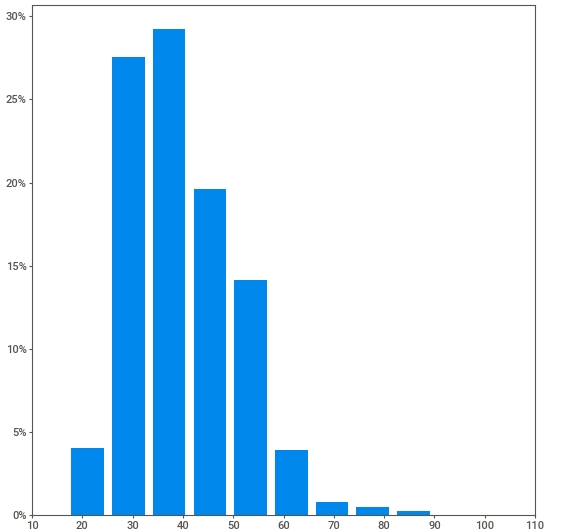
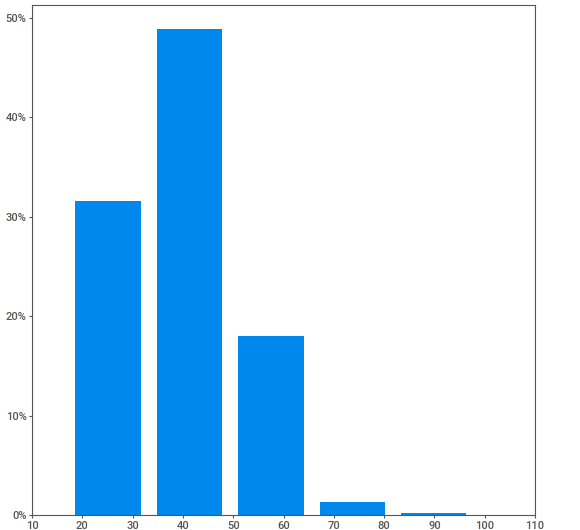
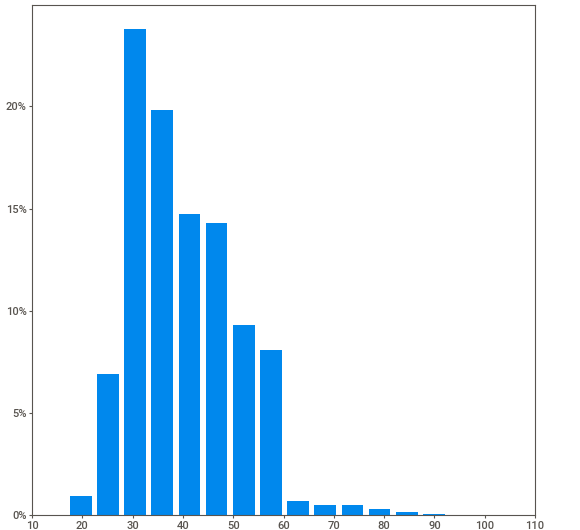
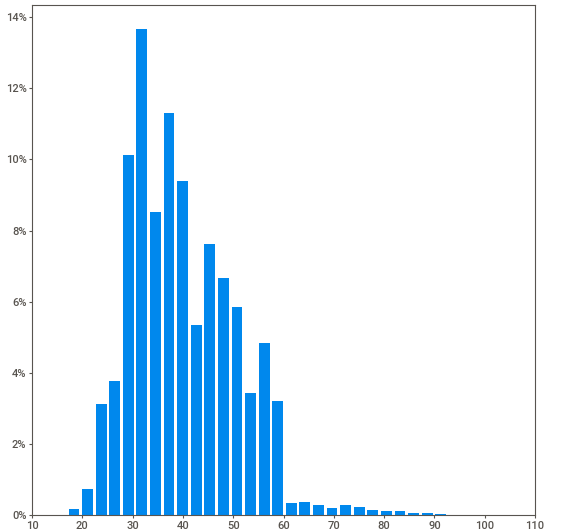
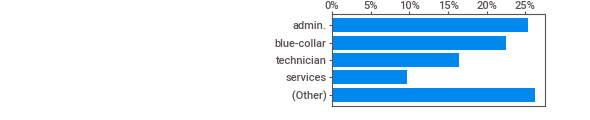
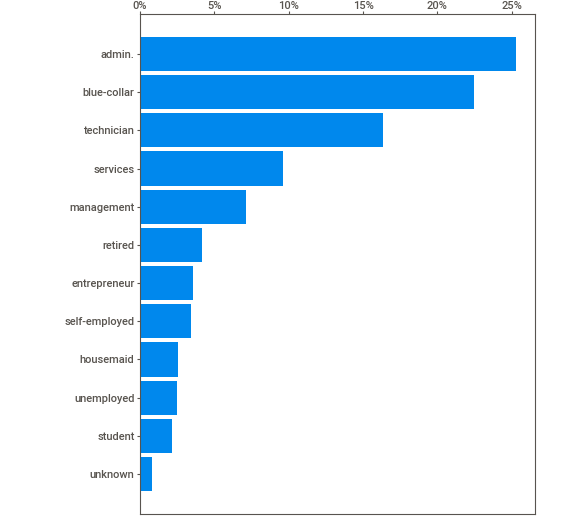
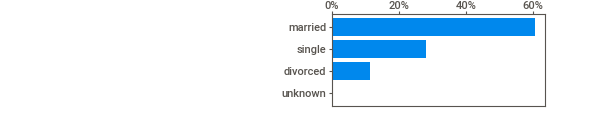
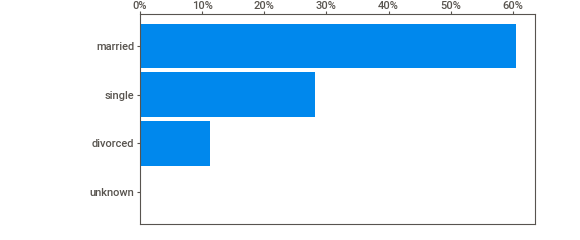
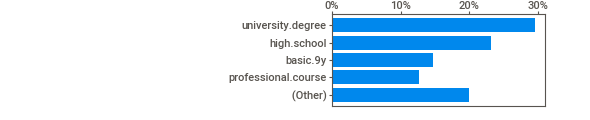
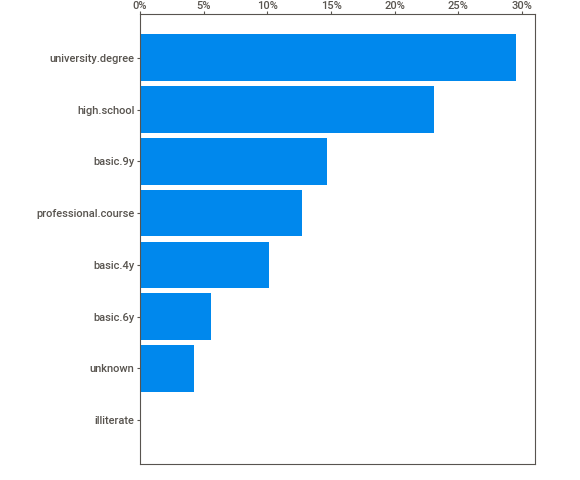
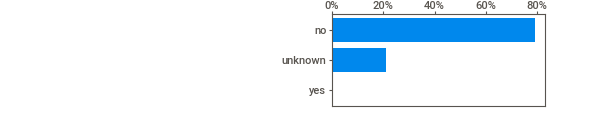
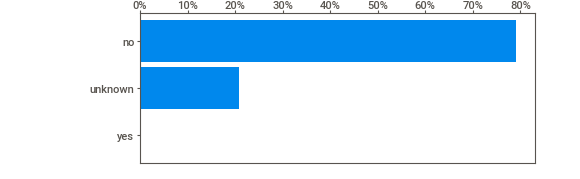
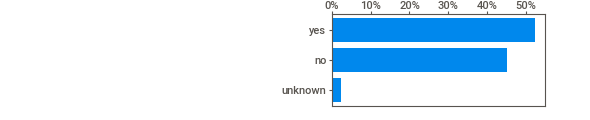
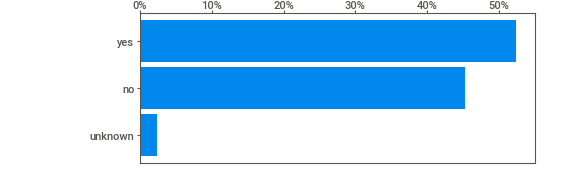
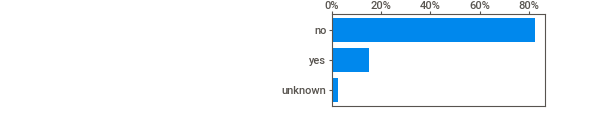
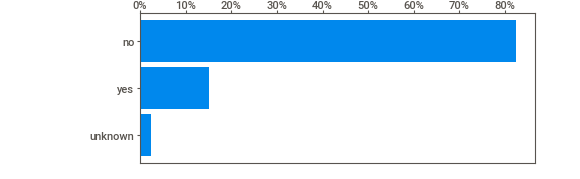
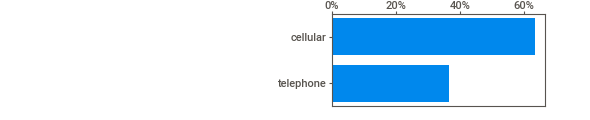
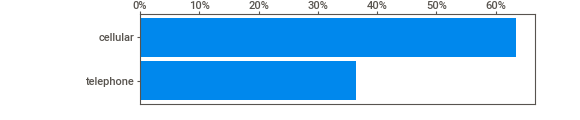
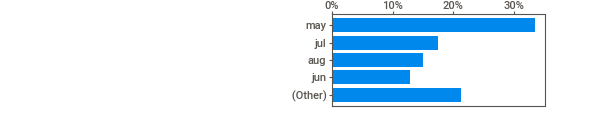
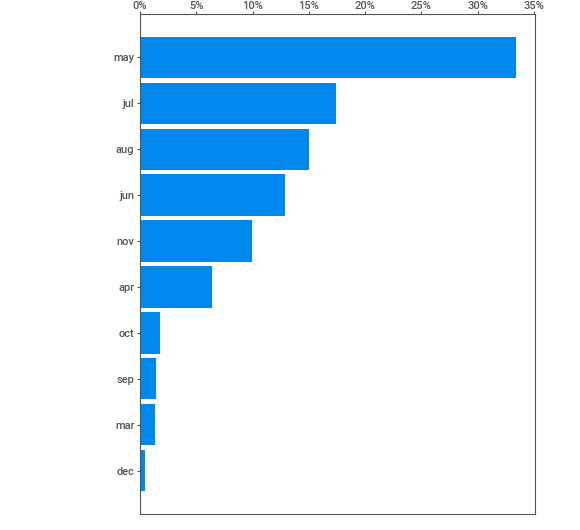
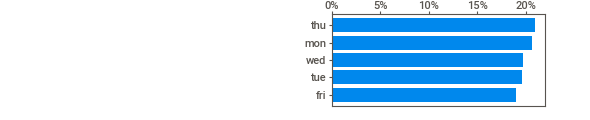
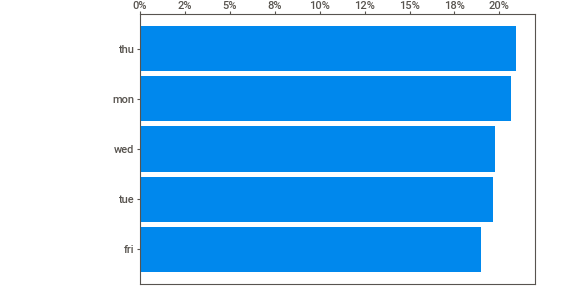
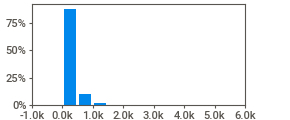
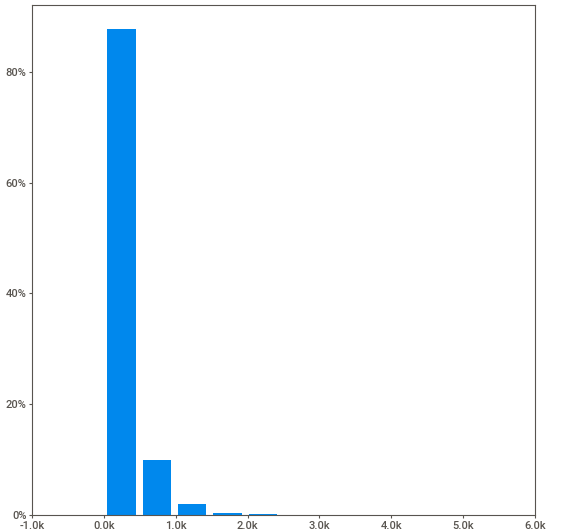
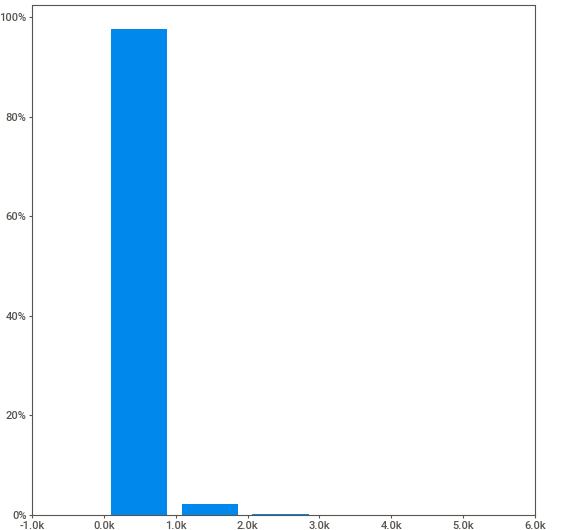
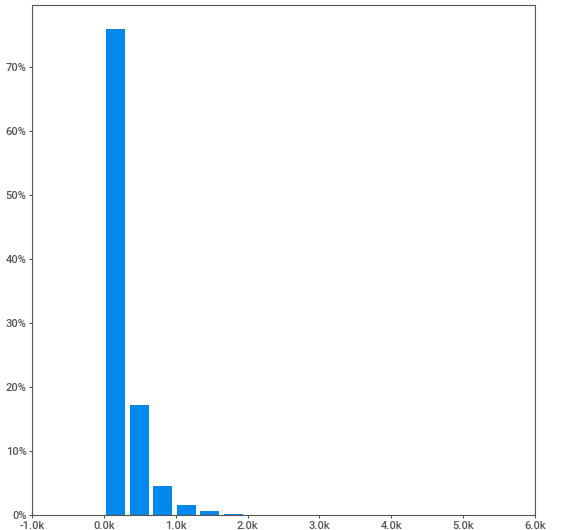
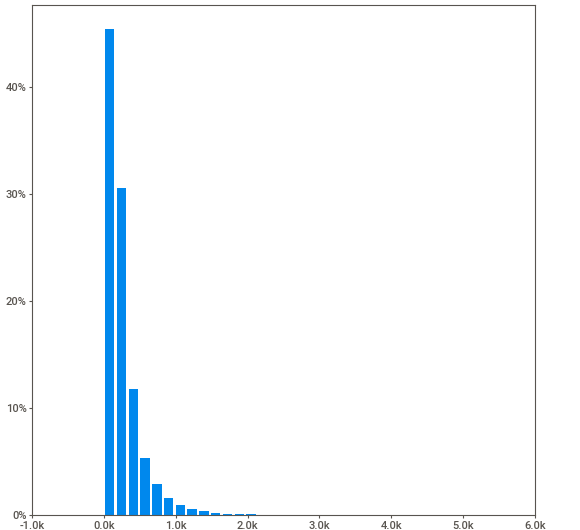
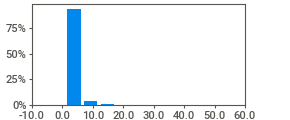
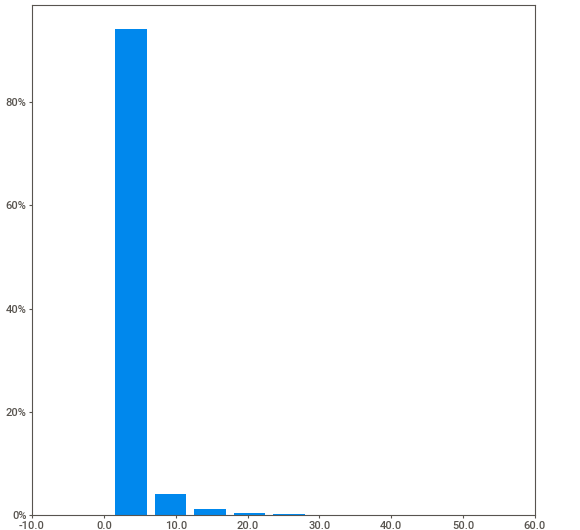
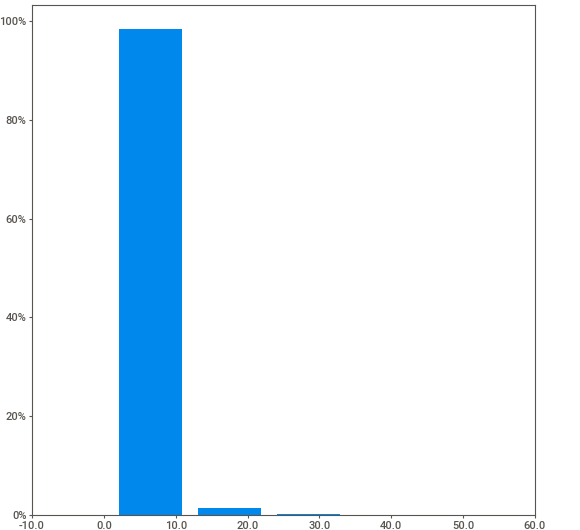
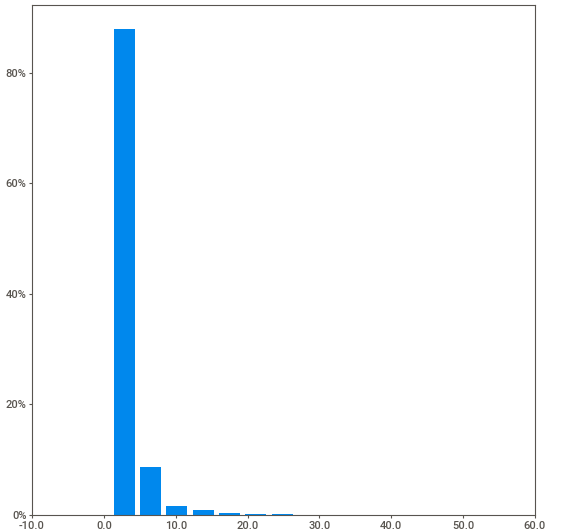
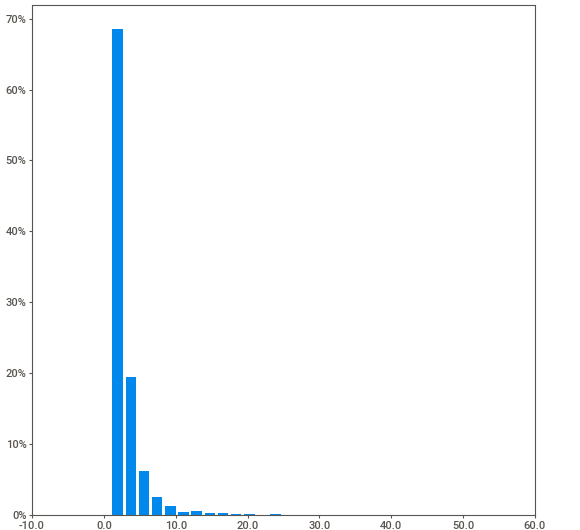
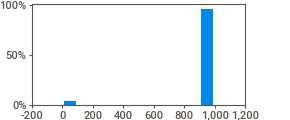
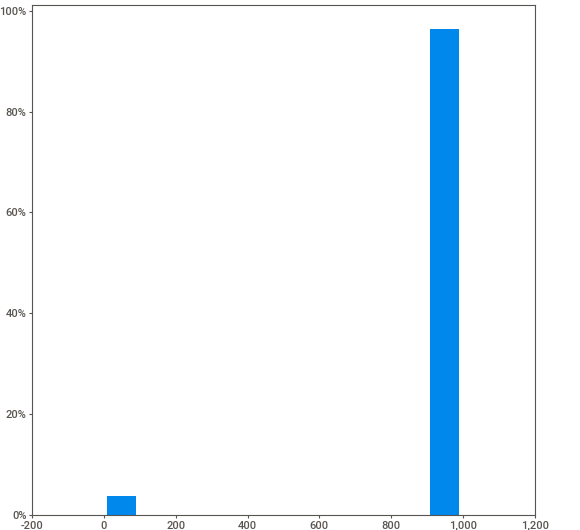
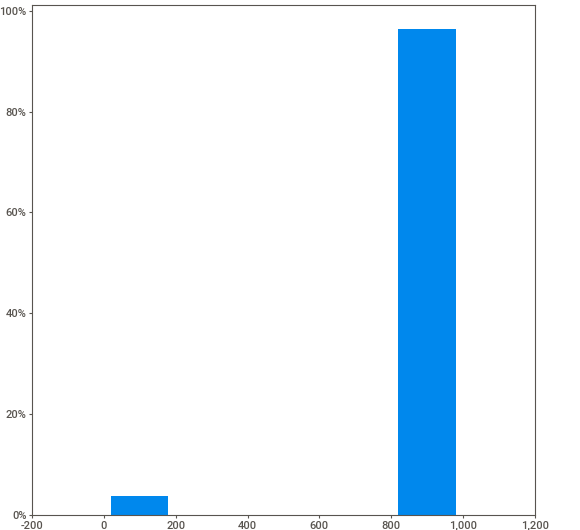
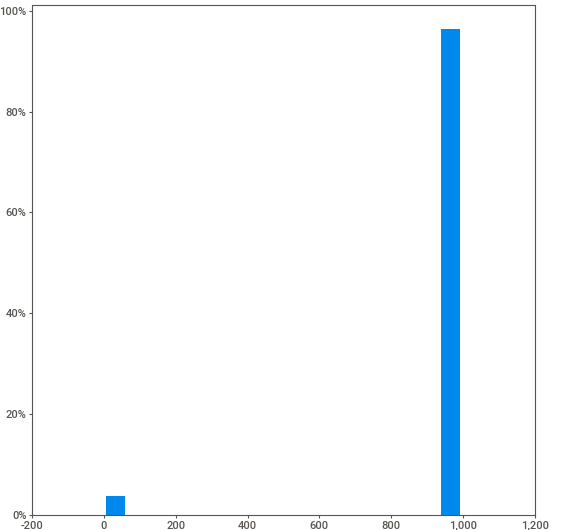
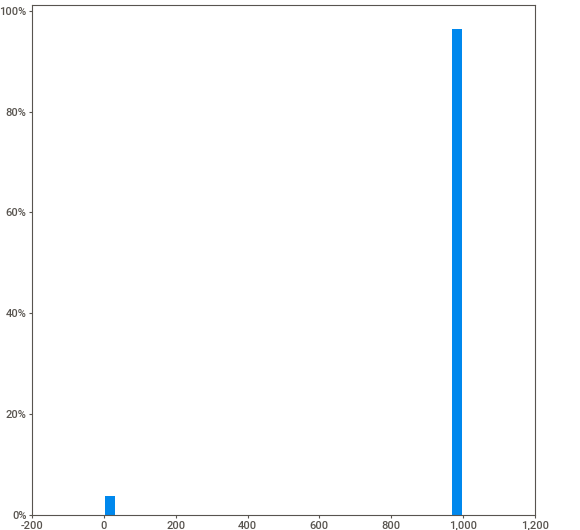
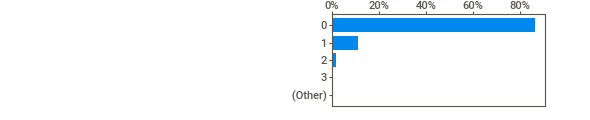
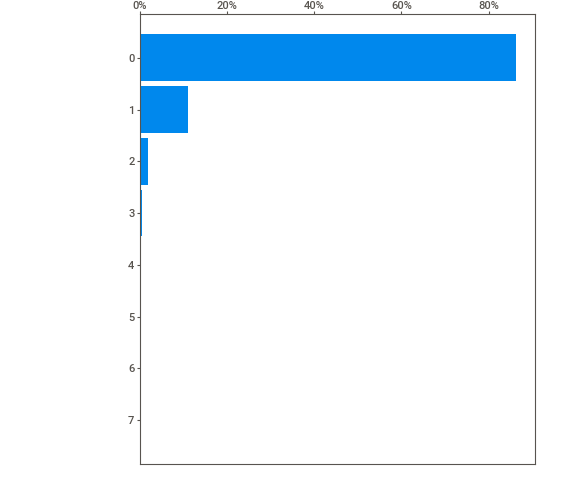
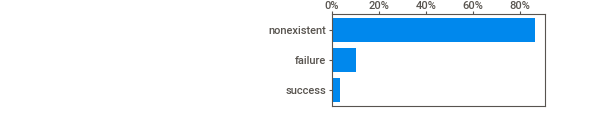
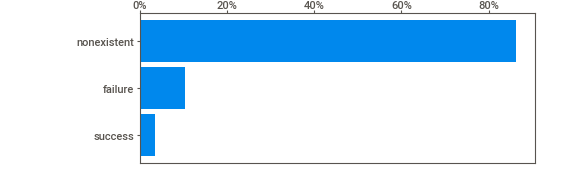
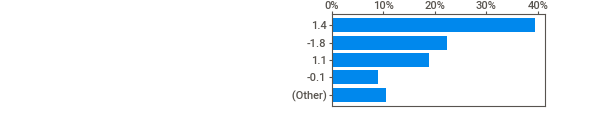
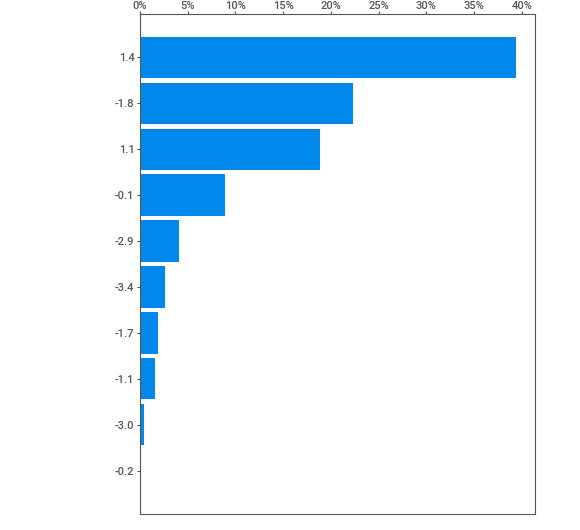
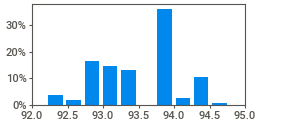
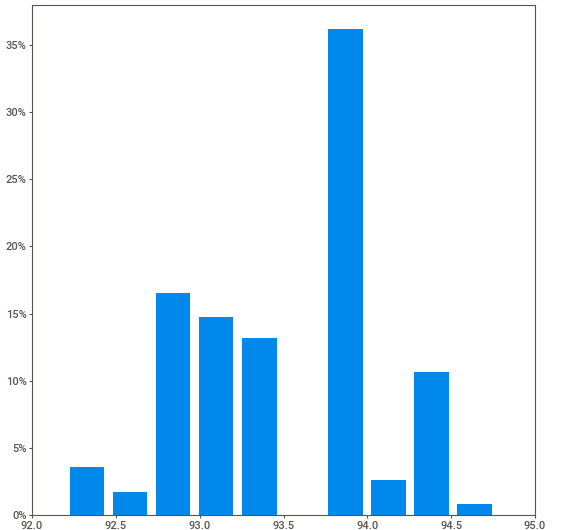
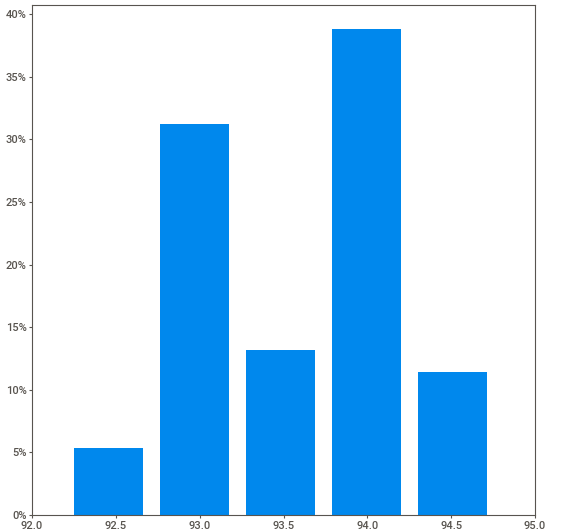
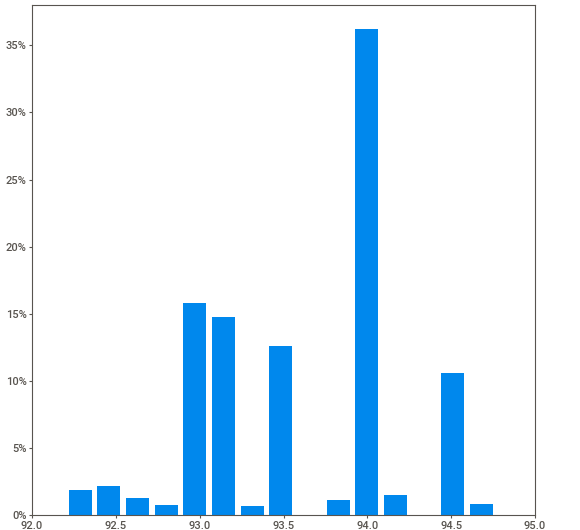
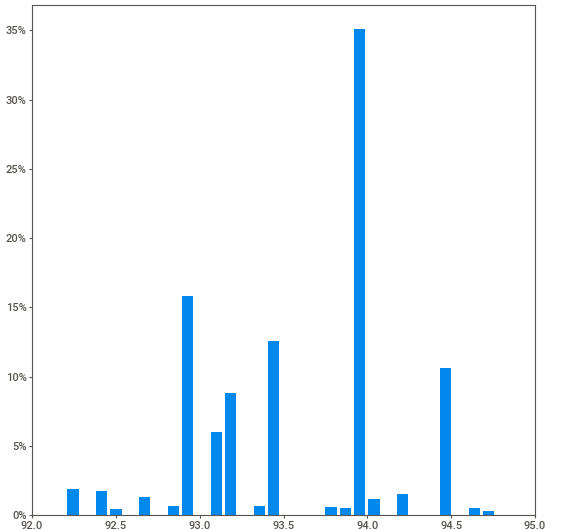
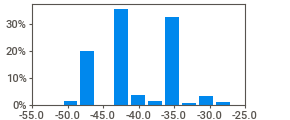
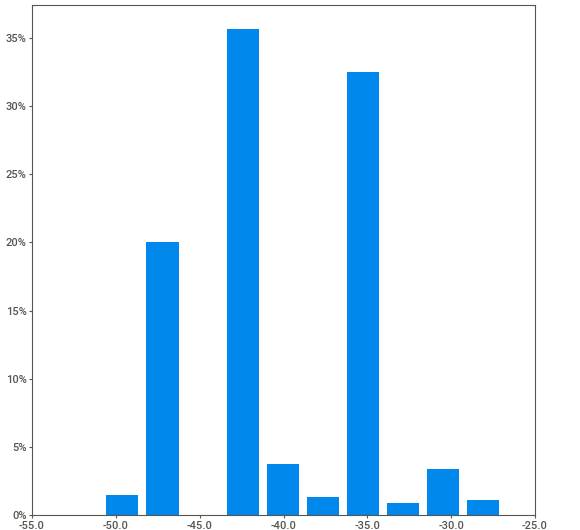
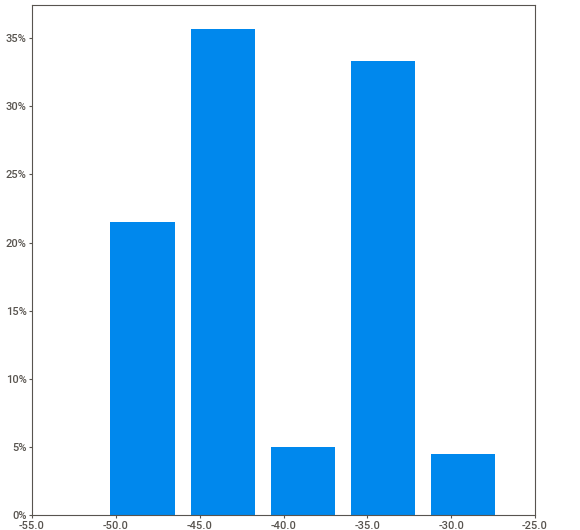
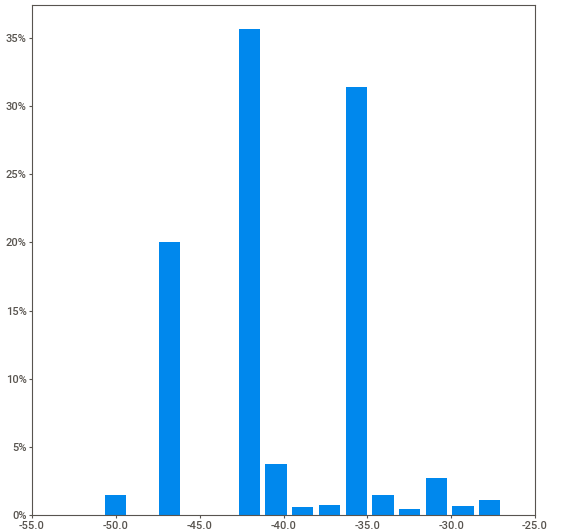
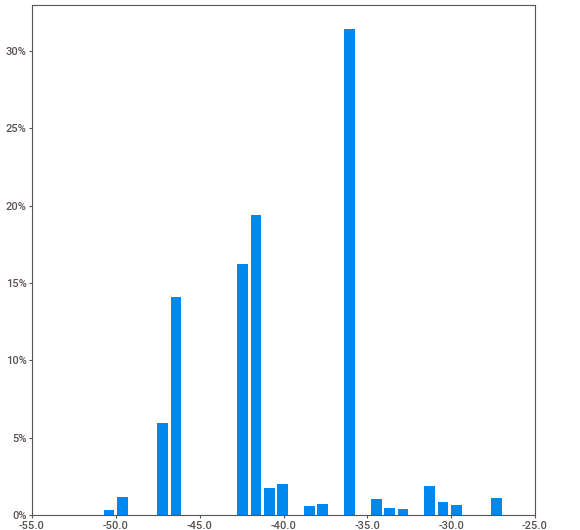
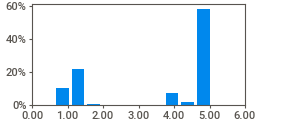
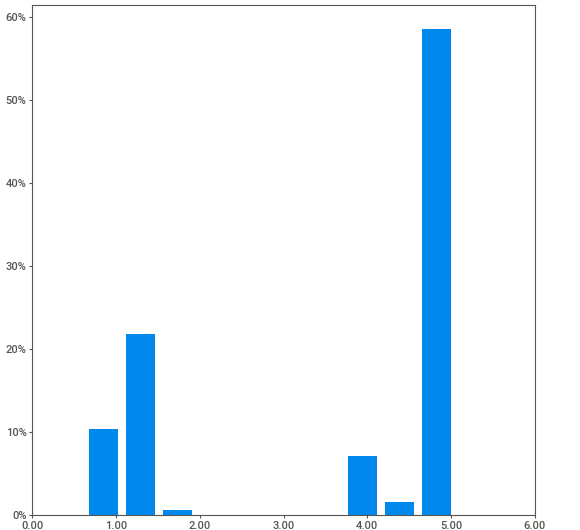
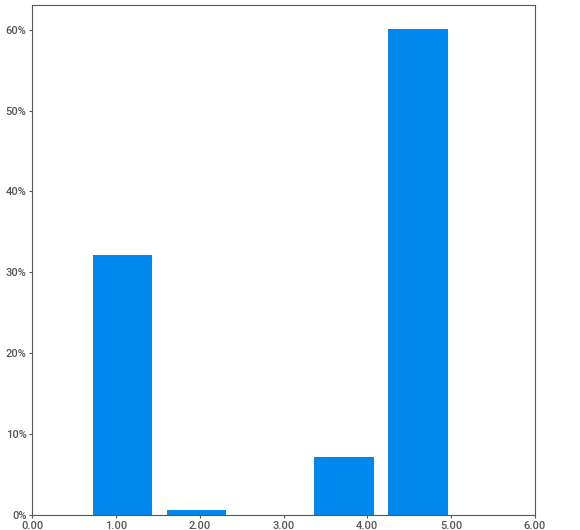
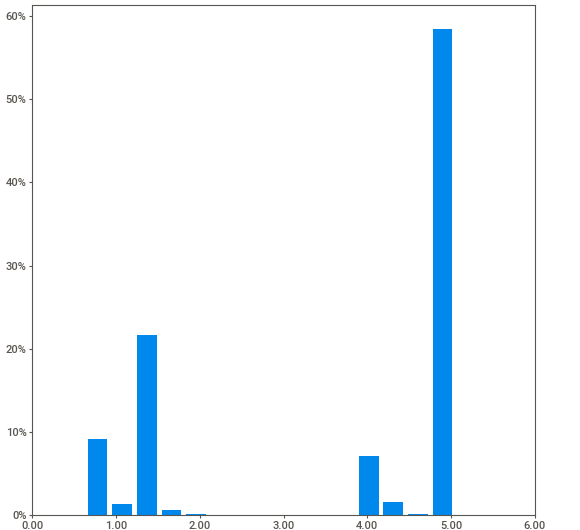
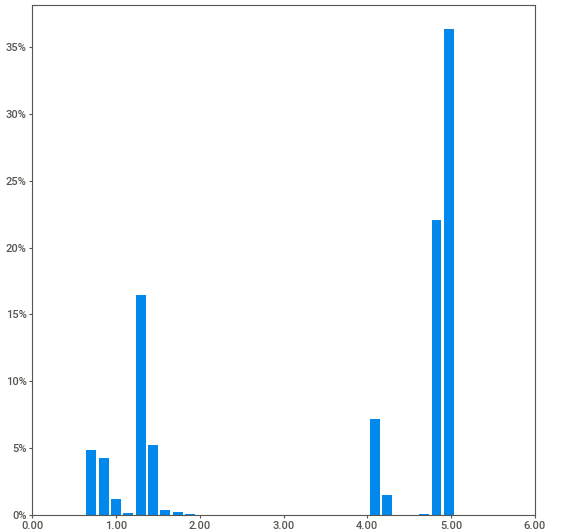
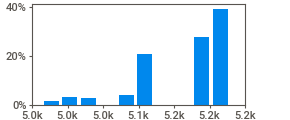
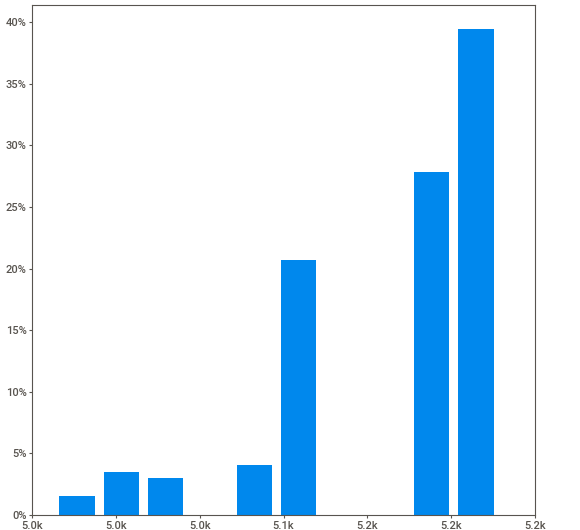
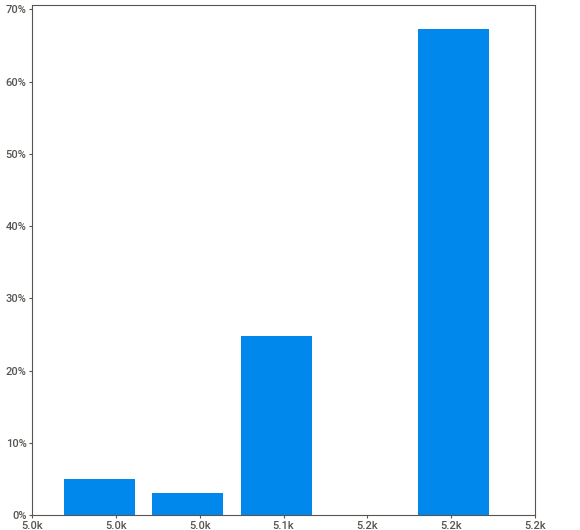
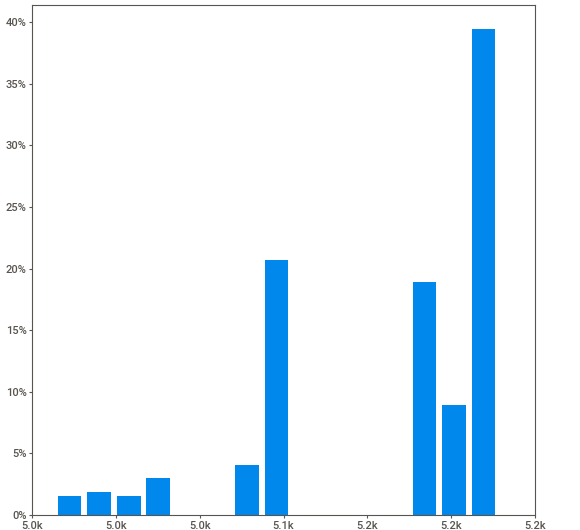
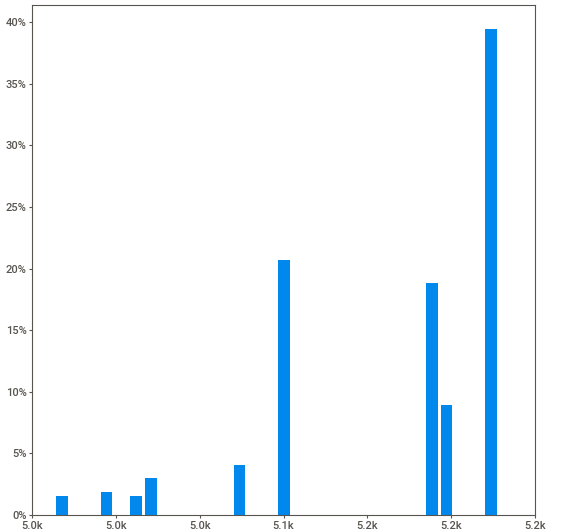
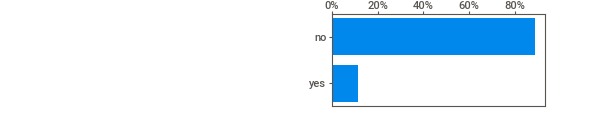
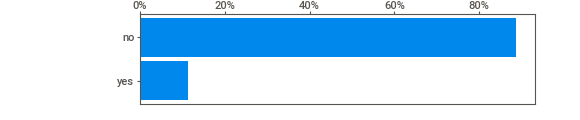
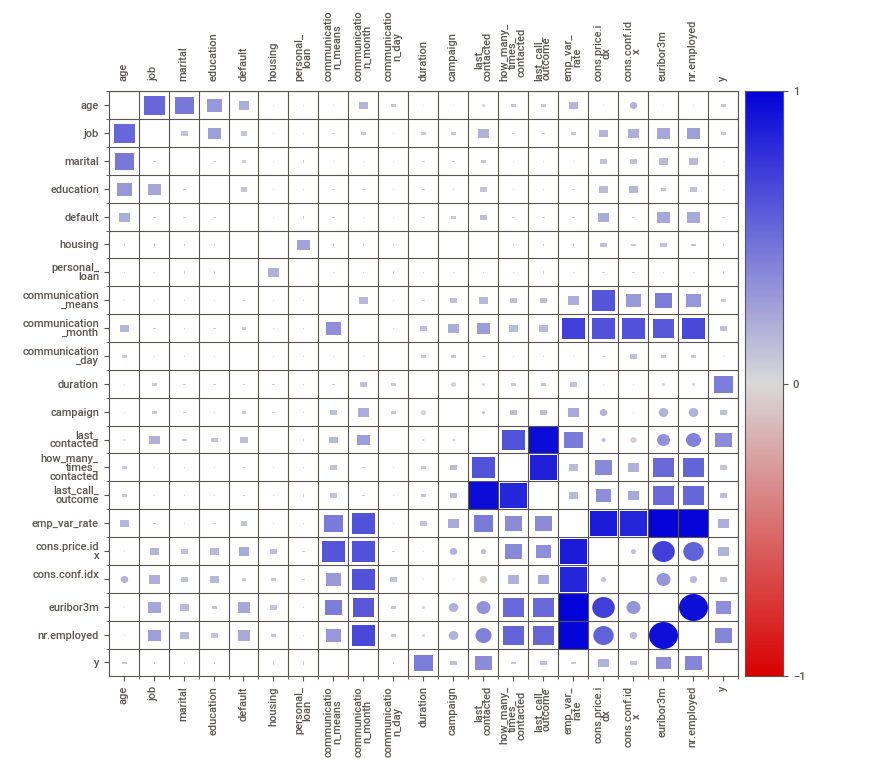
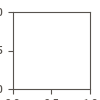

In [13]:
import sweetviz as sv
report = sv.analyze(data);
report.show_notebook();

### Histplots

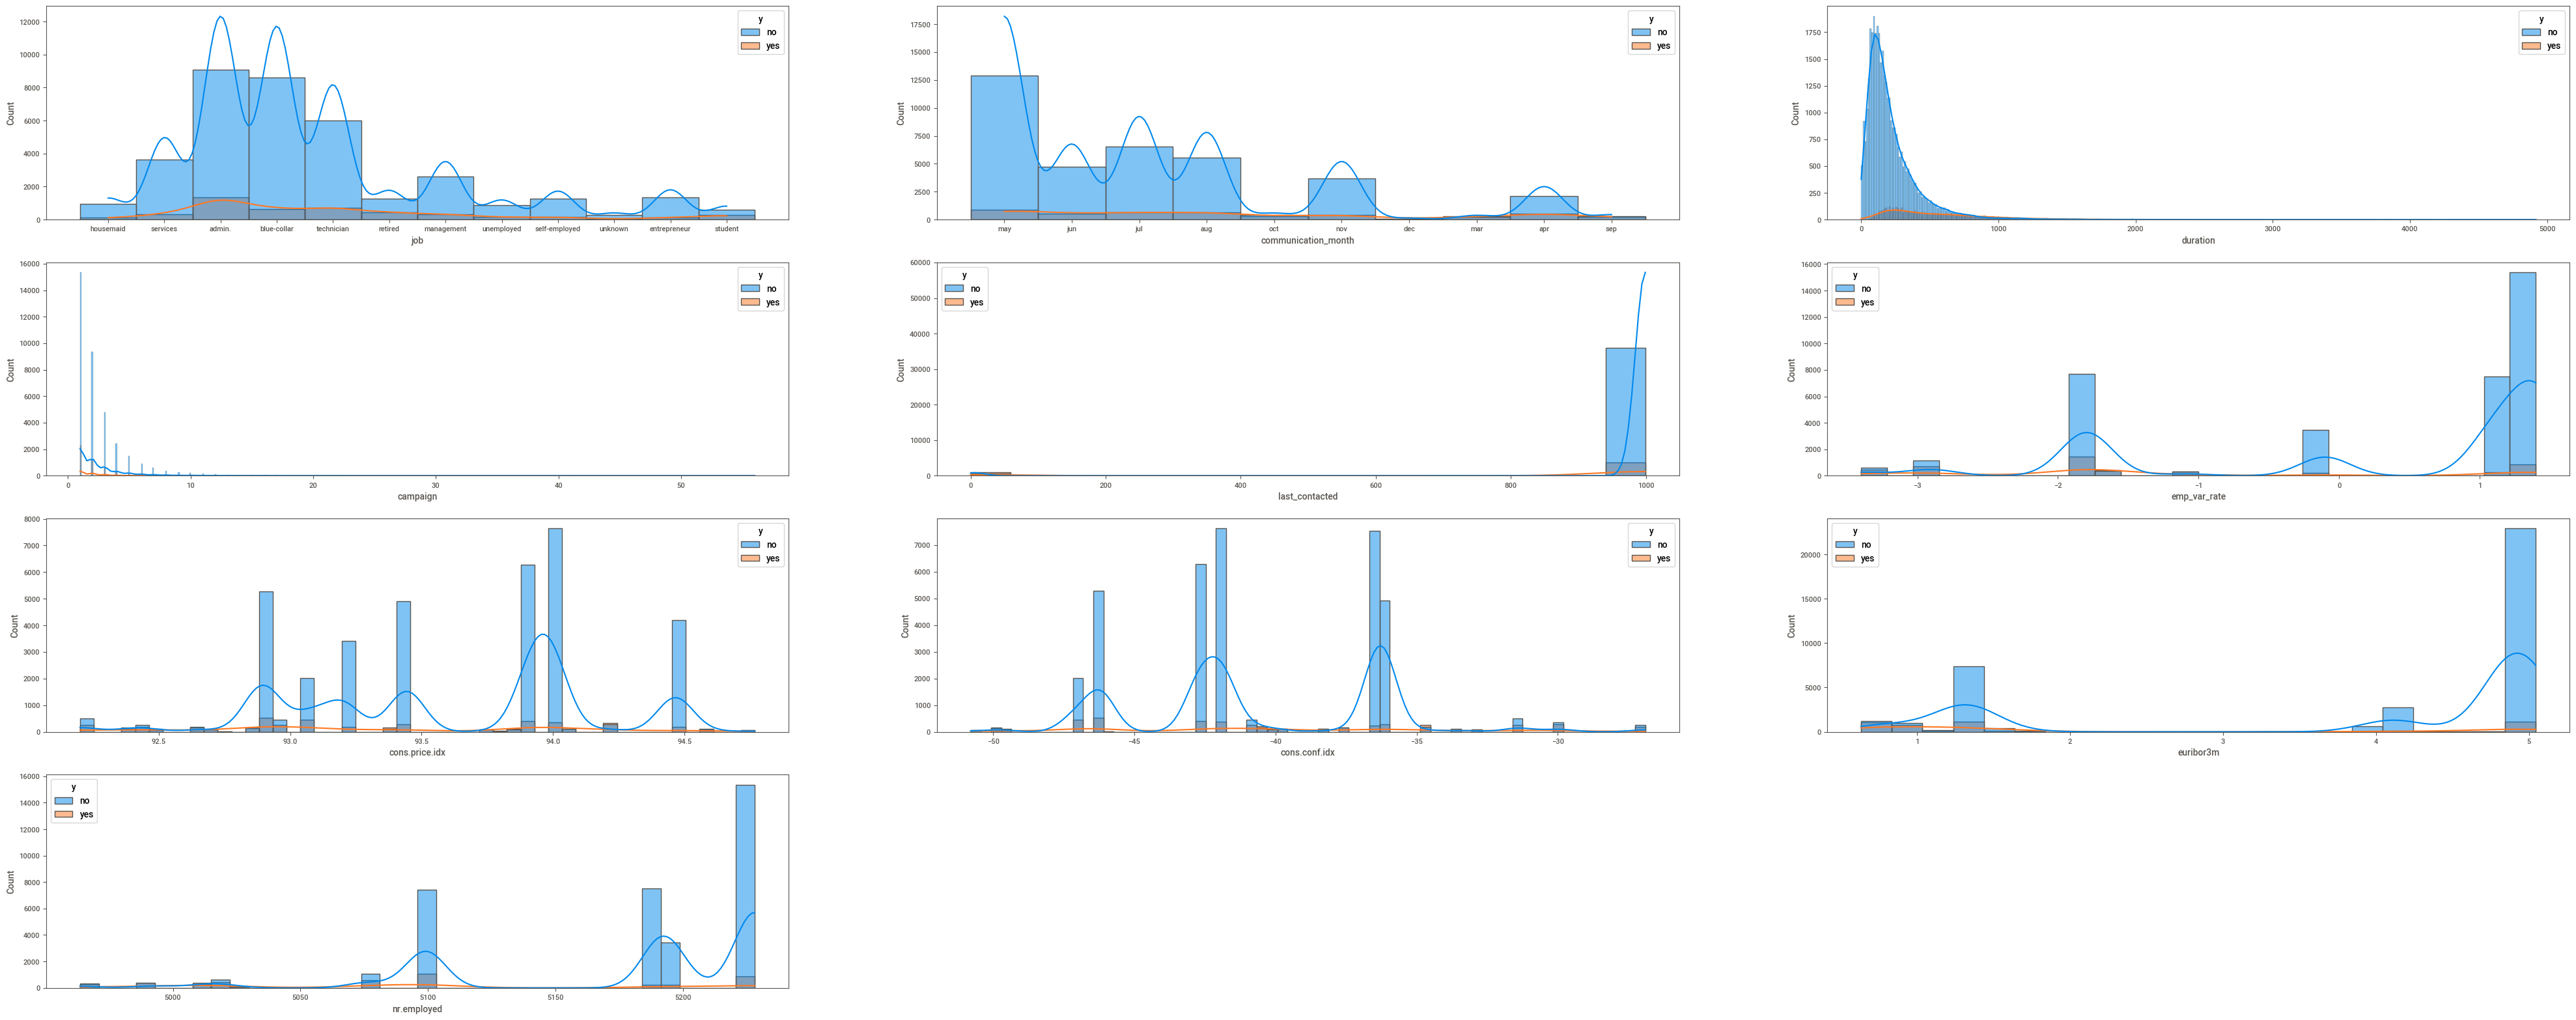

In [14]:
x=continuous
plt.figure(figsize=(50,40))

pltno=1
for i in x:
    plt.subplot(8,3,pltno)
    sns.histplot(x=i,data=data,kde=True,hue='y')
    pltno+=1

### Count Plot

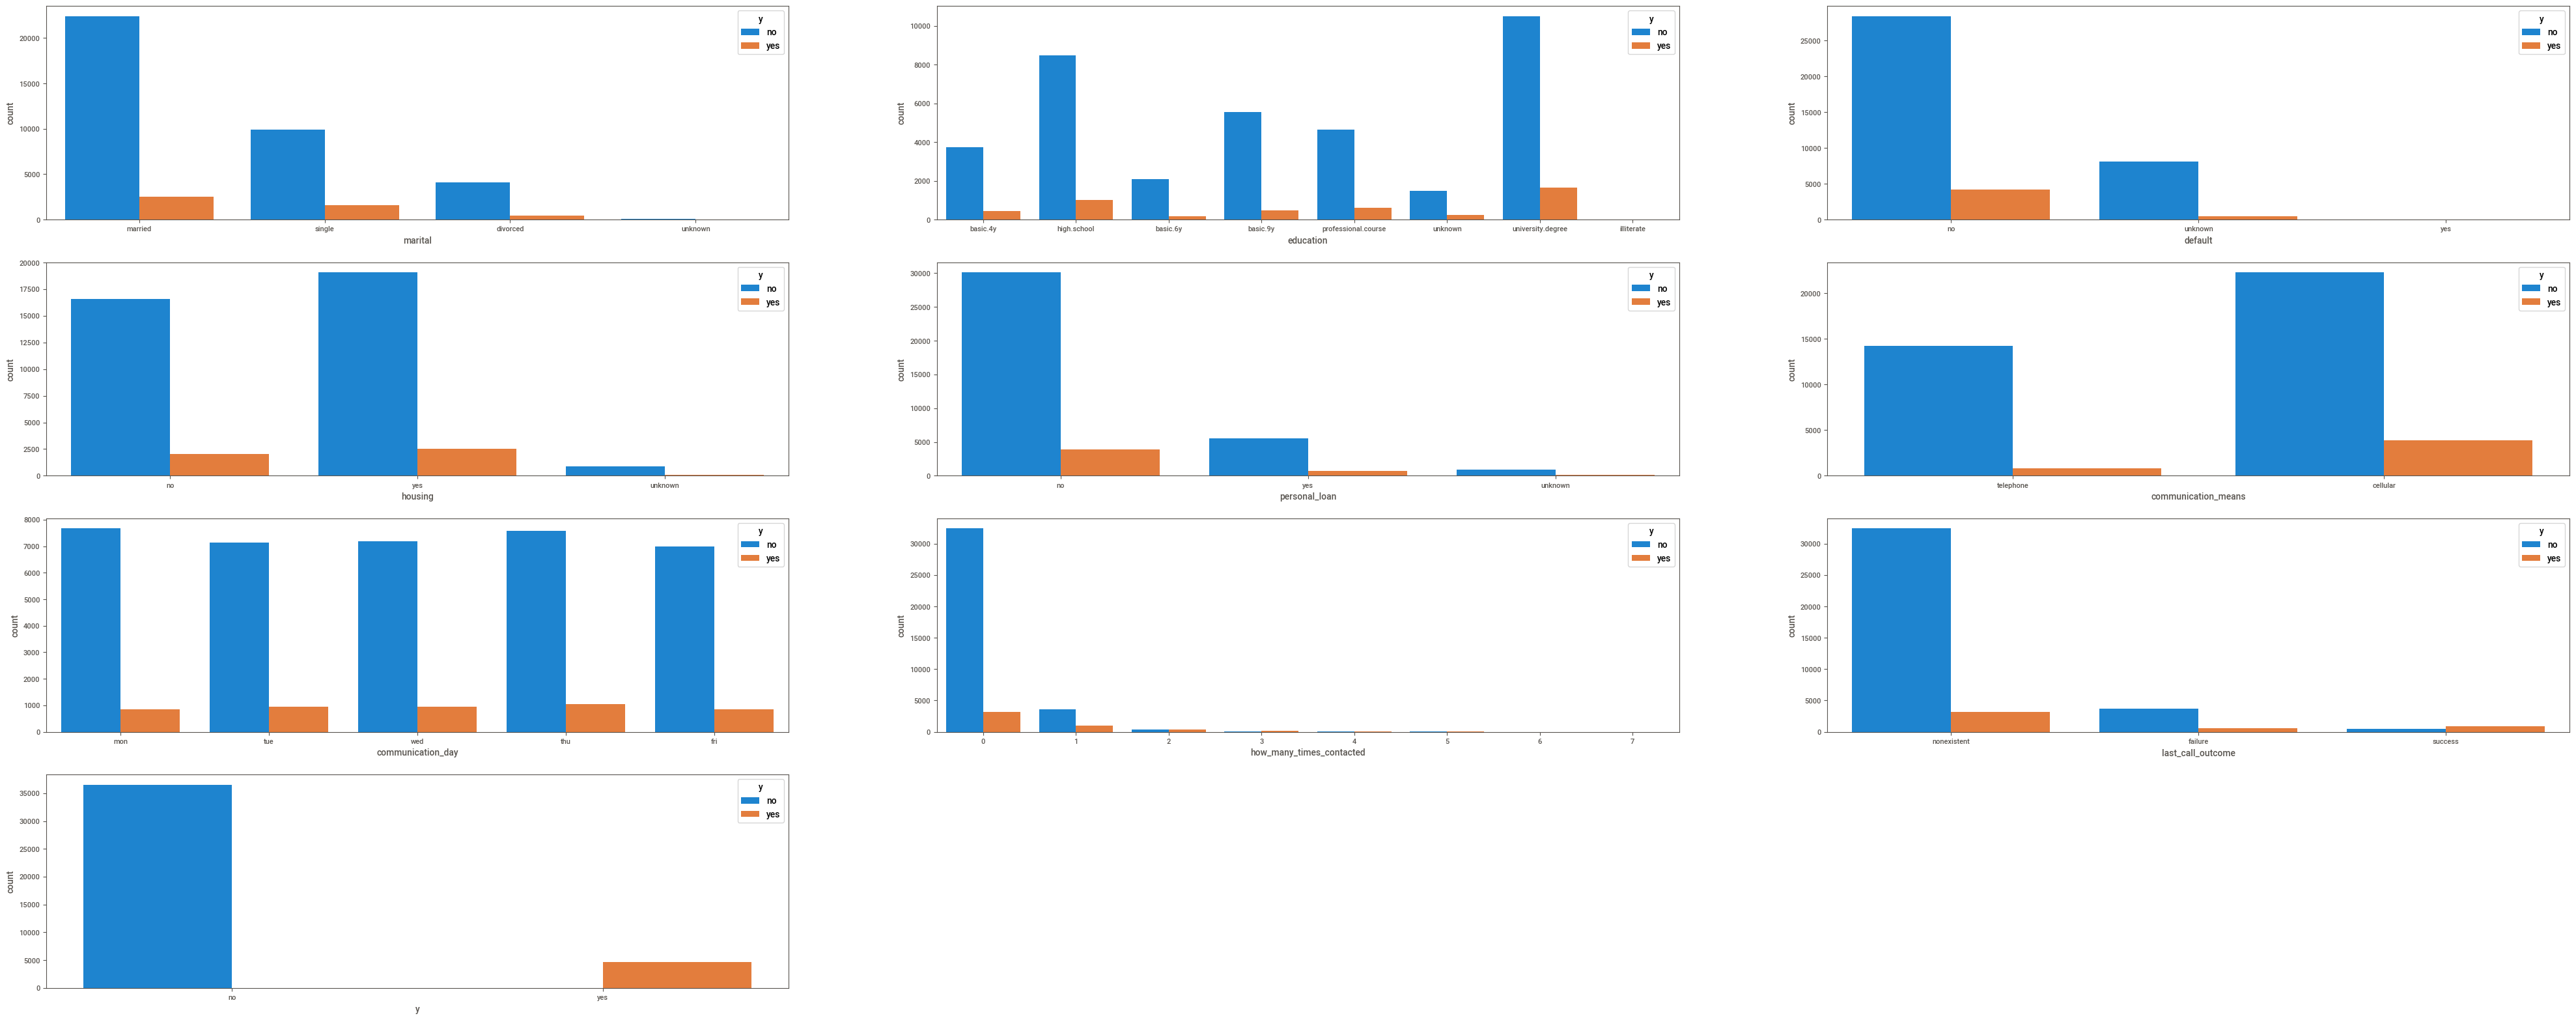

In [15]:
x=discrete
plt.figure(figsize=(50,40))

pltno=1
for i in x:
    plt.subplot(8,3,pltno)
    sns.countplot(x=i,data=data,hue='y')
    pltno+=1

## Bivariate

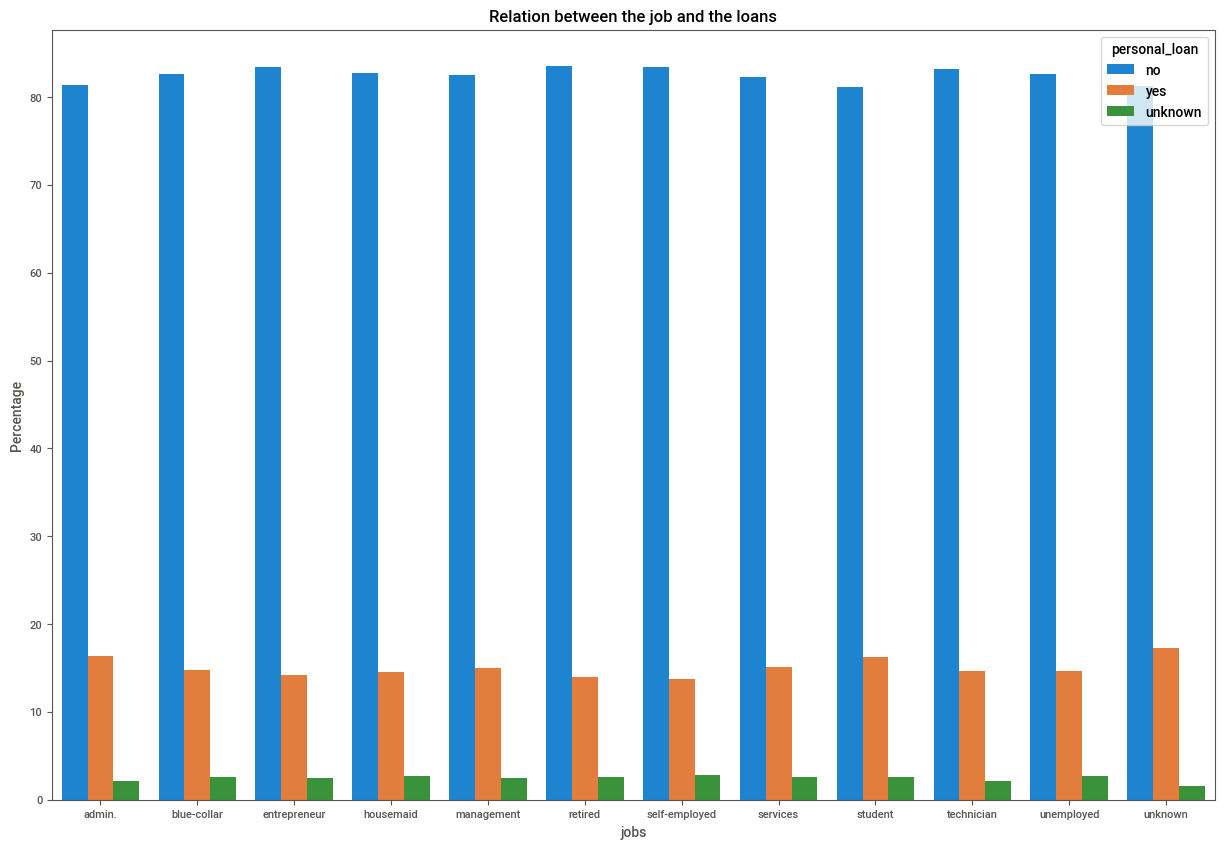

In [16]:
#job vs loans
plt.figure(figsize=(15,10))

df_percentages = data.groupby('job')['personal_loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(x='job', y='percent', hue='personal_loan', data=df_percentages) 

plt.title("Relation between the job and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

<Axes: xlabel='duration', ylabel='Count'>

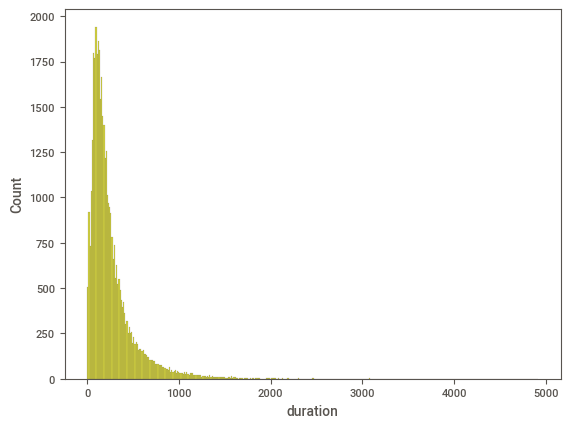

In [17]:
fig = sns.histplot(data,x='duration',color='y')
fig

<Axes: xlabel='age', ylabel='Count'>

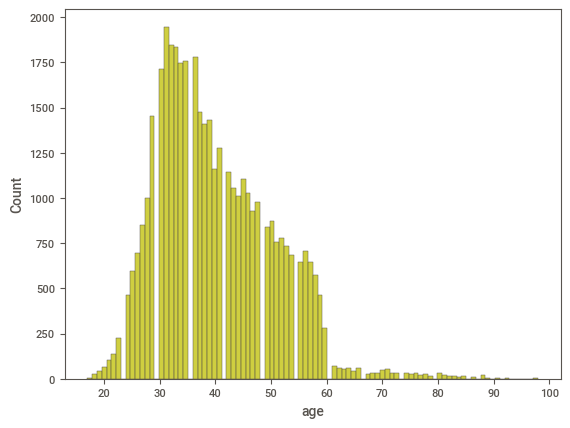

In [18]:
fig = sns.histplot(data,x='age',color='y')
fig

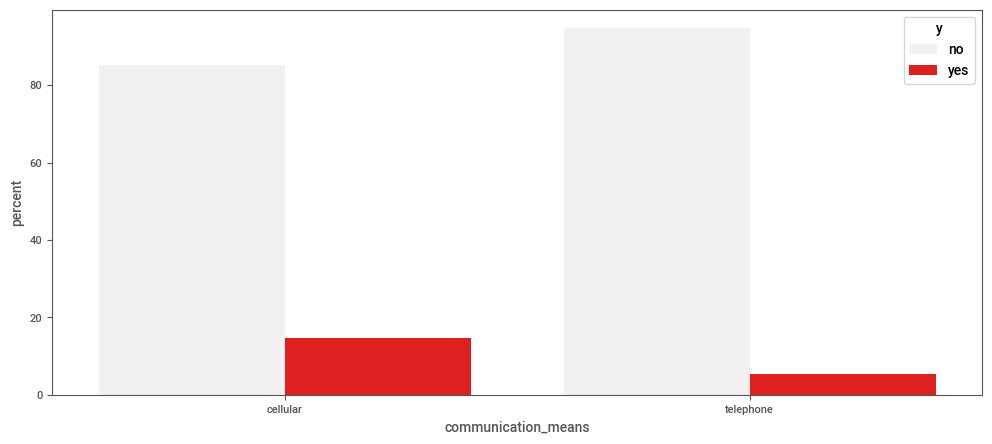

In [19]:
plt.figure(figsize=(12,5))


df_percentages = data.groupby('communication_means')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(x='communication_means', y='percent', hue='y', data=df_percentages, color='red')
plt.show()

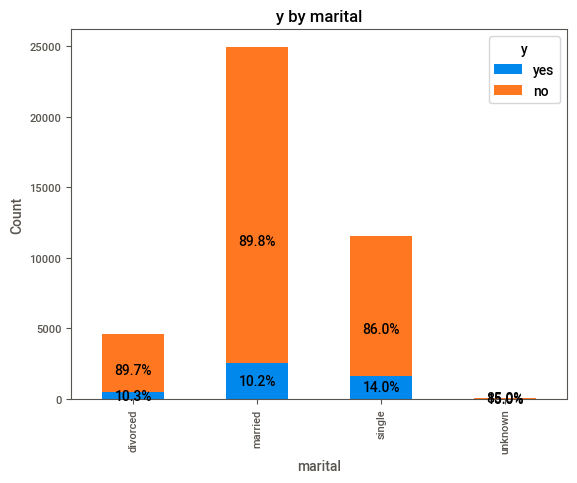

In [20]:
#marital status
grouped = data.groupby('marital')['y'].value_counts().unstack()[['yes', 'no']]
grouped.plot(kind='bar', stacked=True)

plt.title('y by marital')
plt.xlabel('marital')
plt.ylabel('Count')
plt.legend(title='y')

percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100


for i in range(len(grouped)):
    for j in range(len(grouped.columns)):
        value = grouped.iloc[i, j]
        percentage = percentages.iloc[i, j]
        plt.text(i, value / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.show()


In [21]:
#housing personal_loan
grouped_df = data.groupby(['housing', 'y']).size().reset_index(name='counts')
percentages = grouped_df.groupby('housing')['counts'].apply(lambda x: x / x.sum() * 100).reset_index(level=0, drop=True)
grouped_df['percentages'] = percentages
fig = px.bar(grouped_df, x='housing', y='counts', color='y',
             text=grouped_df['percentages'].apply(lambda x: f'{x:.2f}%'))

fig.show()


In [22]:
#education

fig = px.histogram(data, x="y",color = 'education')
fig.show()

In [23]:
# Multi Variant Analysis

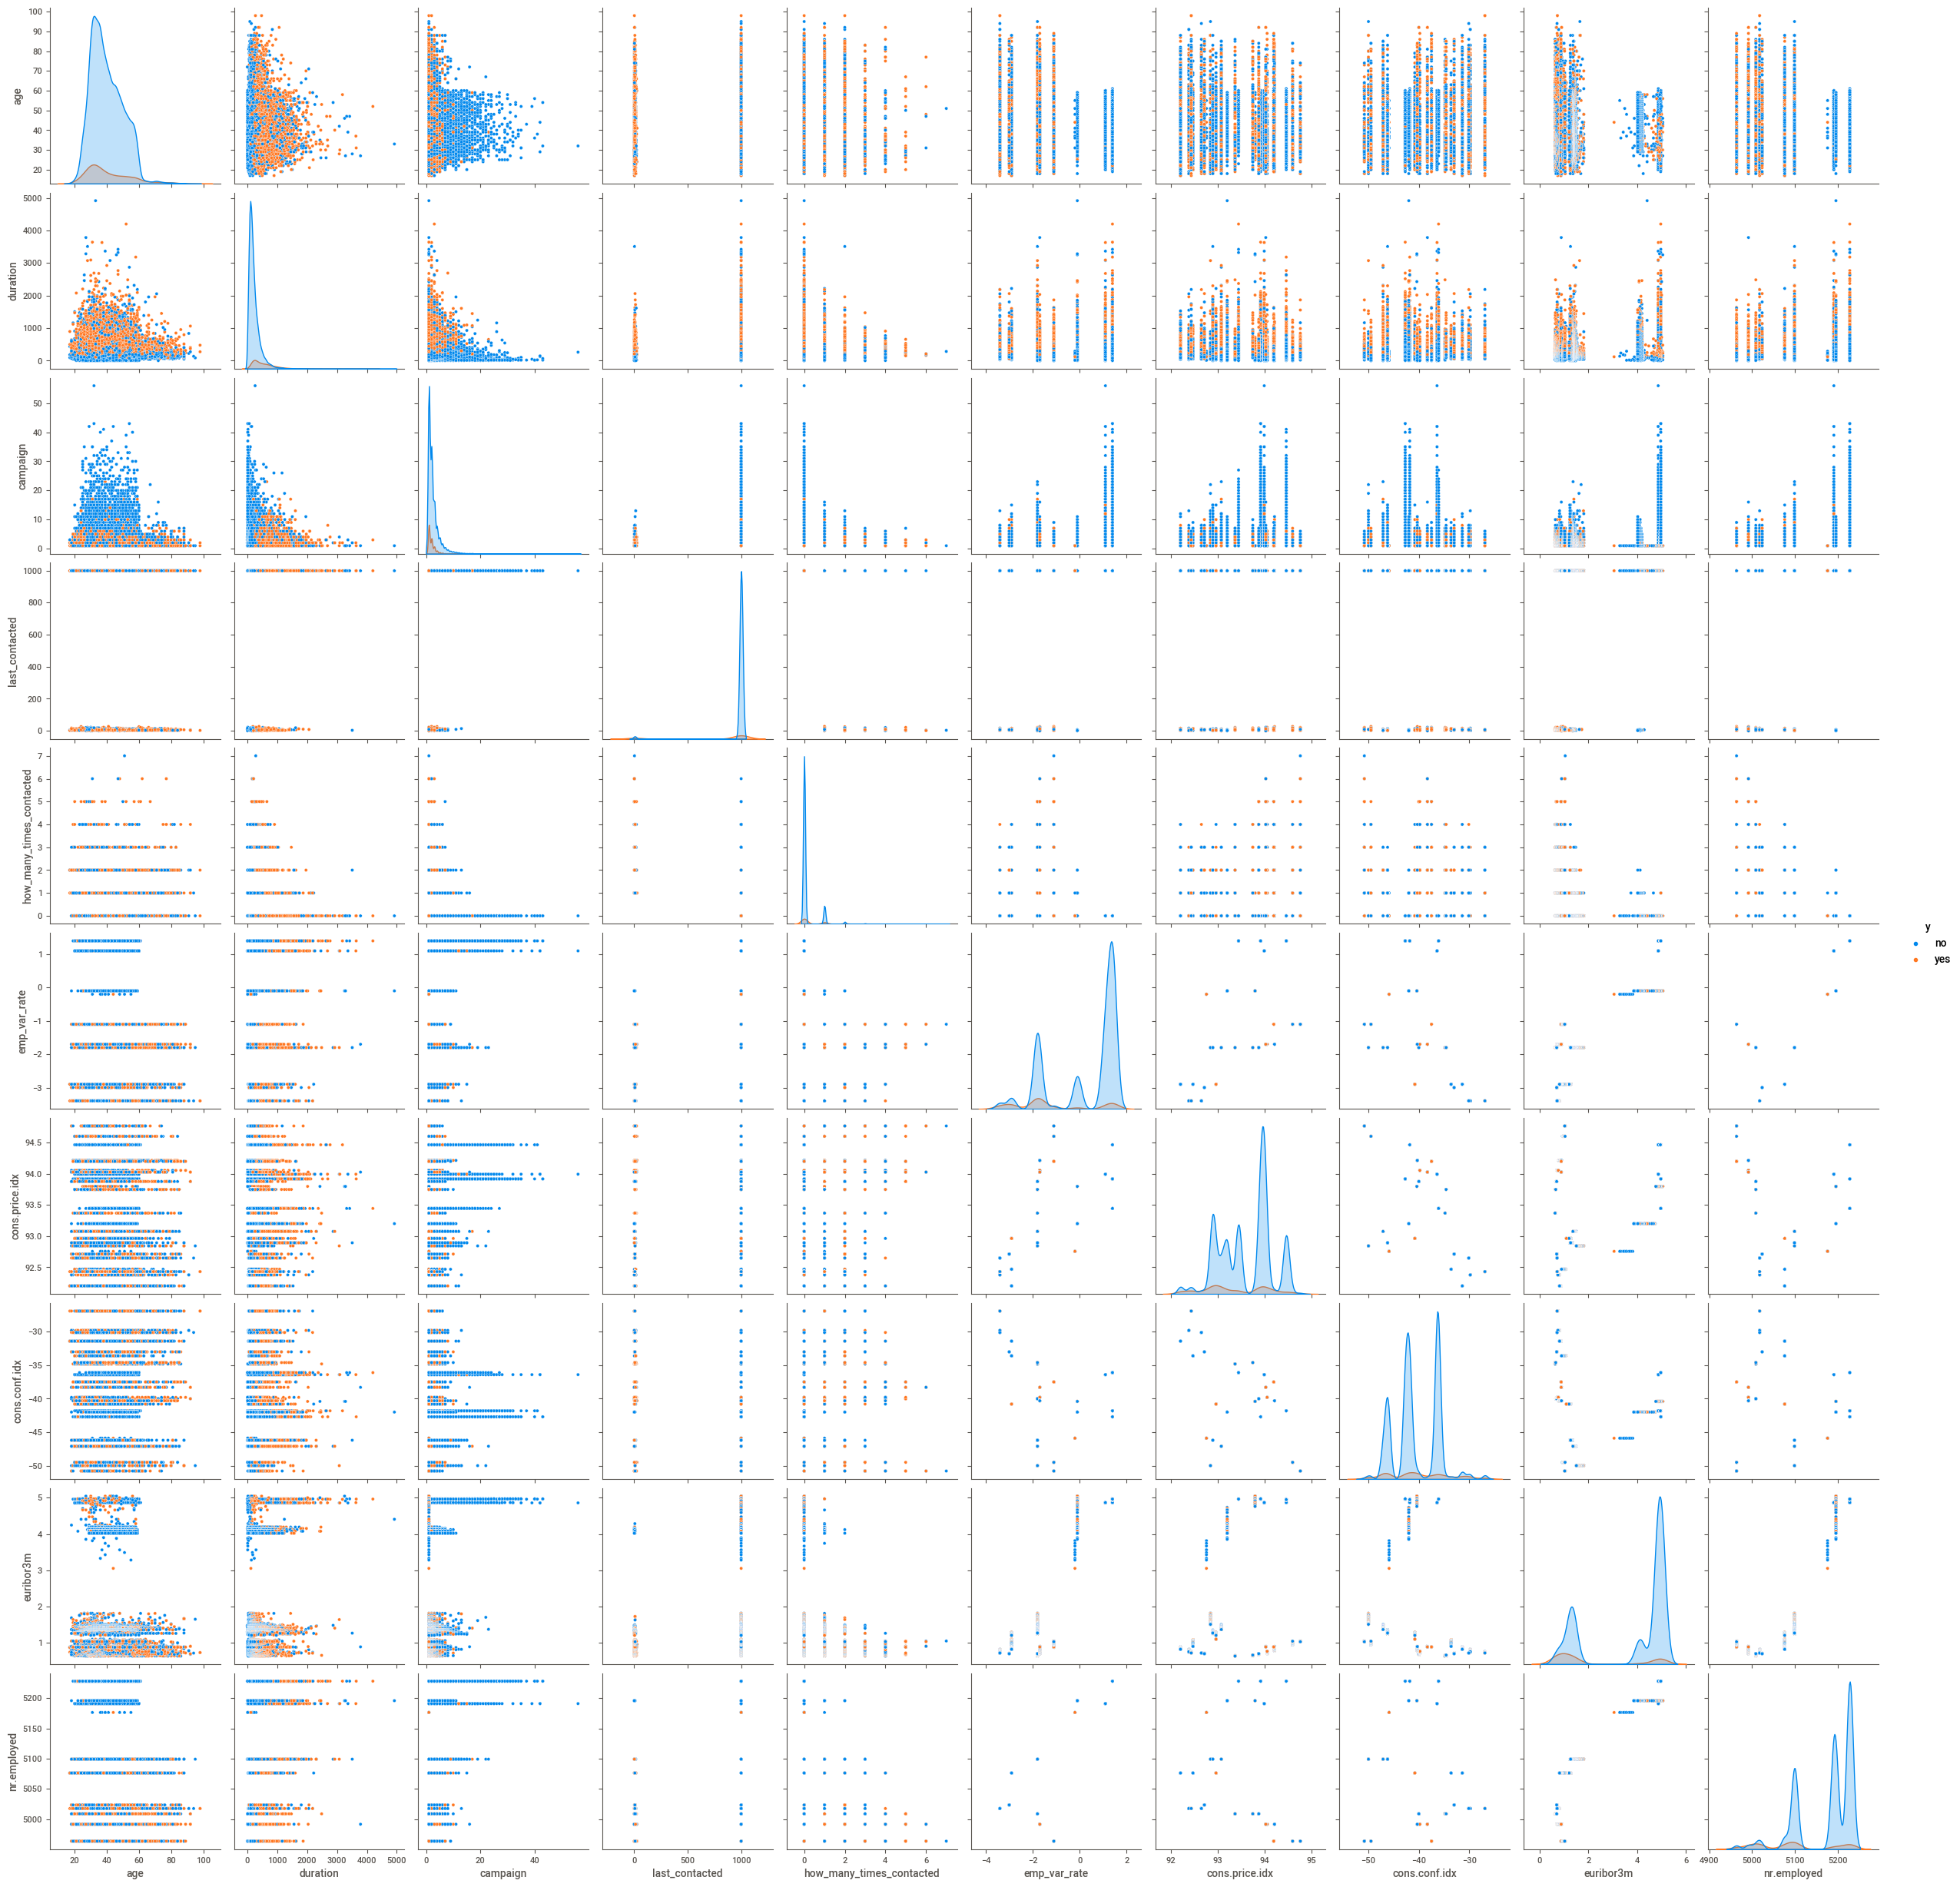

In [24]:
sns.pairplot(data,hue='y')

1. People aged between 30-40 years were contacted the most
 2. People from "admin" job role and people from "blue-collared" job roles were contacted the most 
 3. Married people were contacted the most followed by single people
 4. people with 'university' education followed by 'high school' education were contacted the most 
 5. we can see that most of the people that were contacted did not have a default status
 6. 52% of the people contacted had prior housing loans
 7. 82% of the people contacted did not have any sort of personal loan running
 8. 63% of the people were contacted via 'cellular' means whereas 37% were contacted via 'telephone'
 9. most people were contacted in the month of may
 10. The days in which people were contacted were evenly spread across the weekdays
 11. The duration of calls were on an average of 4.3 minutes
 12. A person was contacted an average of 2.6 times
 13. 86% of the people were contacted for the first time 
 14. The data from the success of previous calls is mostly non-existent 

# Data Preprocessing and Feature Engineering

## Outliers

age
469
upper_fence : 69.5
lower_fence : 9.5
27713    70
27757    76
27780    73
27800    88
27802    88
         ..
40986    84
40996    81
41004    80
41183    73
41187    74
Name: age, Length: 469, dtype: int64
as of now the no of coumns is = 1
as of now the total no of outlier is = 469
******************************************
duration
2963
upper_fence : 644.5
lower_fence : -223.5
37       1666
57        787
61        812
75       1575
83       1042
         ... 
41147     712
41153     655
41160     843
41164    1868
41166     651
Name: duration, Length: 2963, dtype: int64
as of now the no of coumns is = 2
as of now the total no of outlier is = 3432
******************************************
campaign
2406
upper_fence : 6.0
lower_fence : -2.0
887      7
1043     8
1094     8
1097     7
1230     7
        ..
40611    9
40631    7
40698    7
40821    9
40993    7
Name: campaign, Length: 2406, dtype: int64
as of now the no of coumns is = 3
as of now the total no of outlier is = 5838


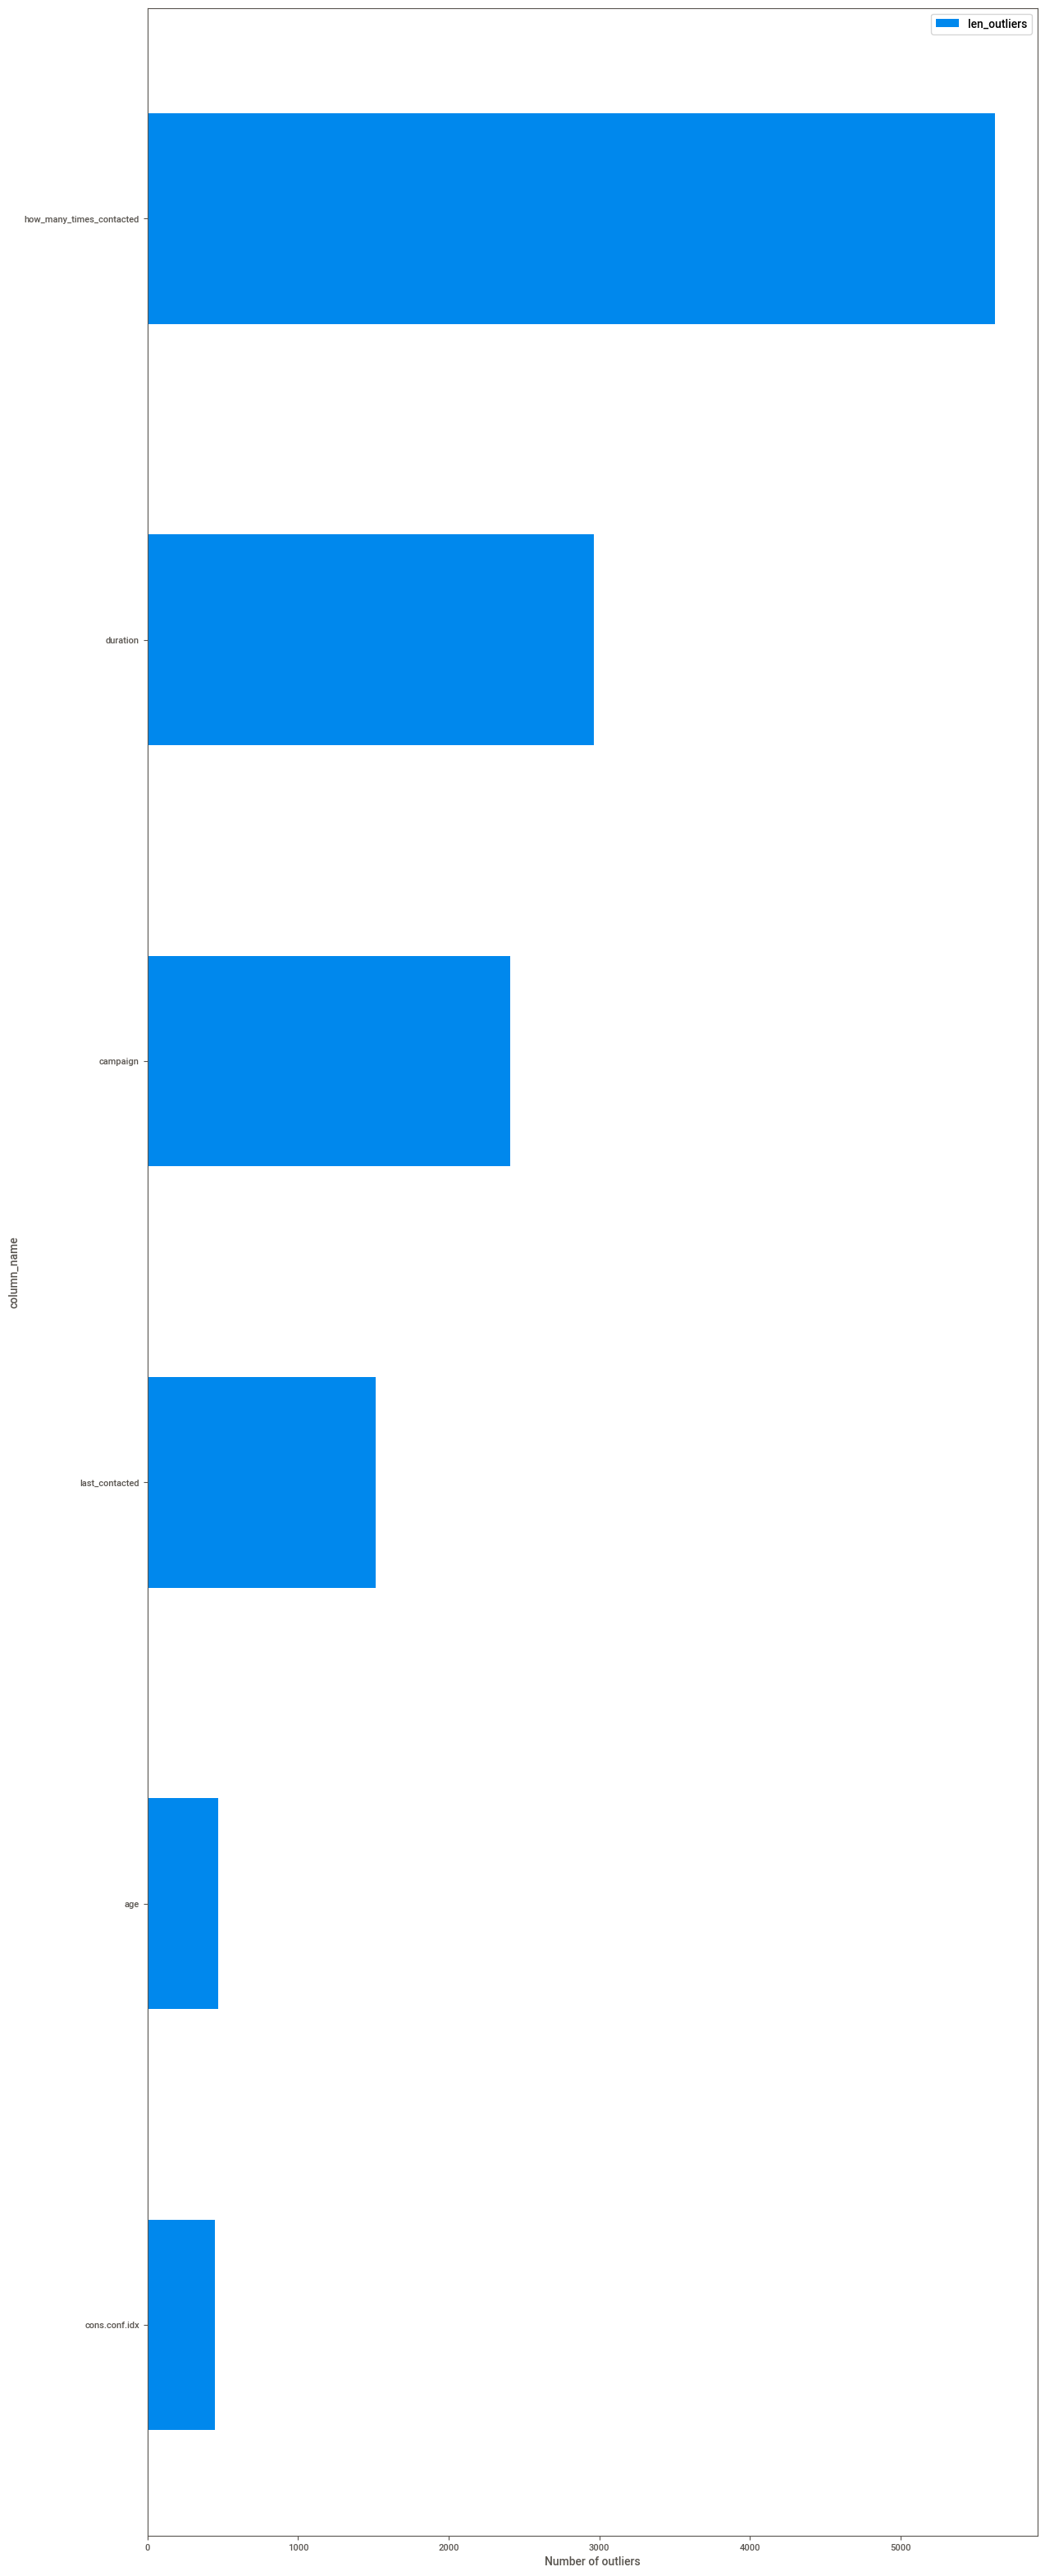

In [25]:
outlier_columns,no_outlier_columns,outlier_free=outliers_iqr(data,'y')

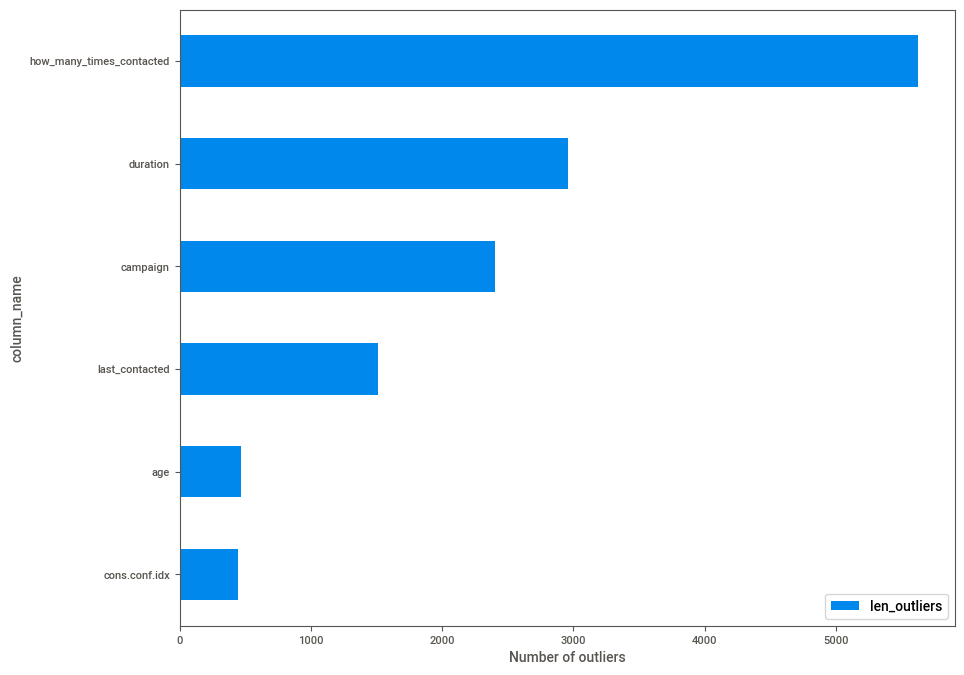

In [26]:
outlier_columns.sort_values('percentile').plot(kind='barh', figsize=(10, 8), x='column_name', y='len_outliers')
plt.xlabel('Number of outliers')
plt.show()

In [27]:
outlier_columns

column_name  len_outliers  percentile
0                       age           469    1.138681
1                  duration          2963    7.193843
2                  campaign          2406    5.841507
3            last_contacted          1515    3.678256
4  how_many_times_contacted          5625   13.656890
5             cons.conf.idx           447    1.085268

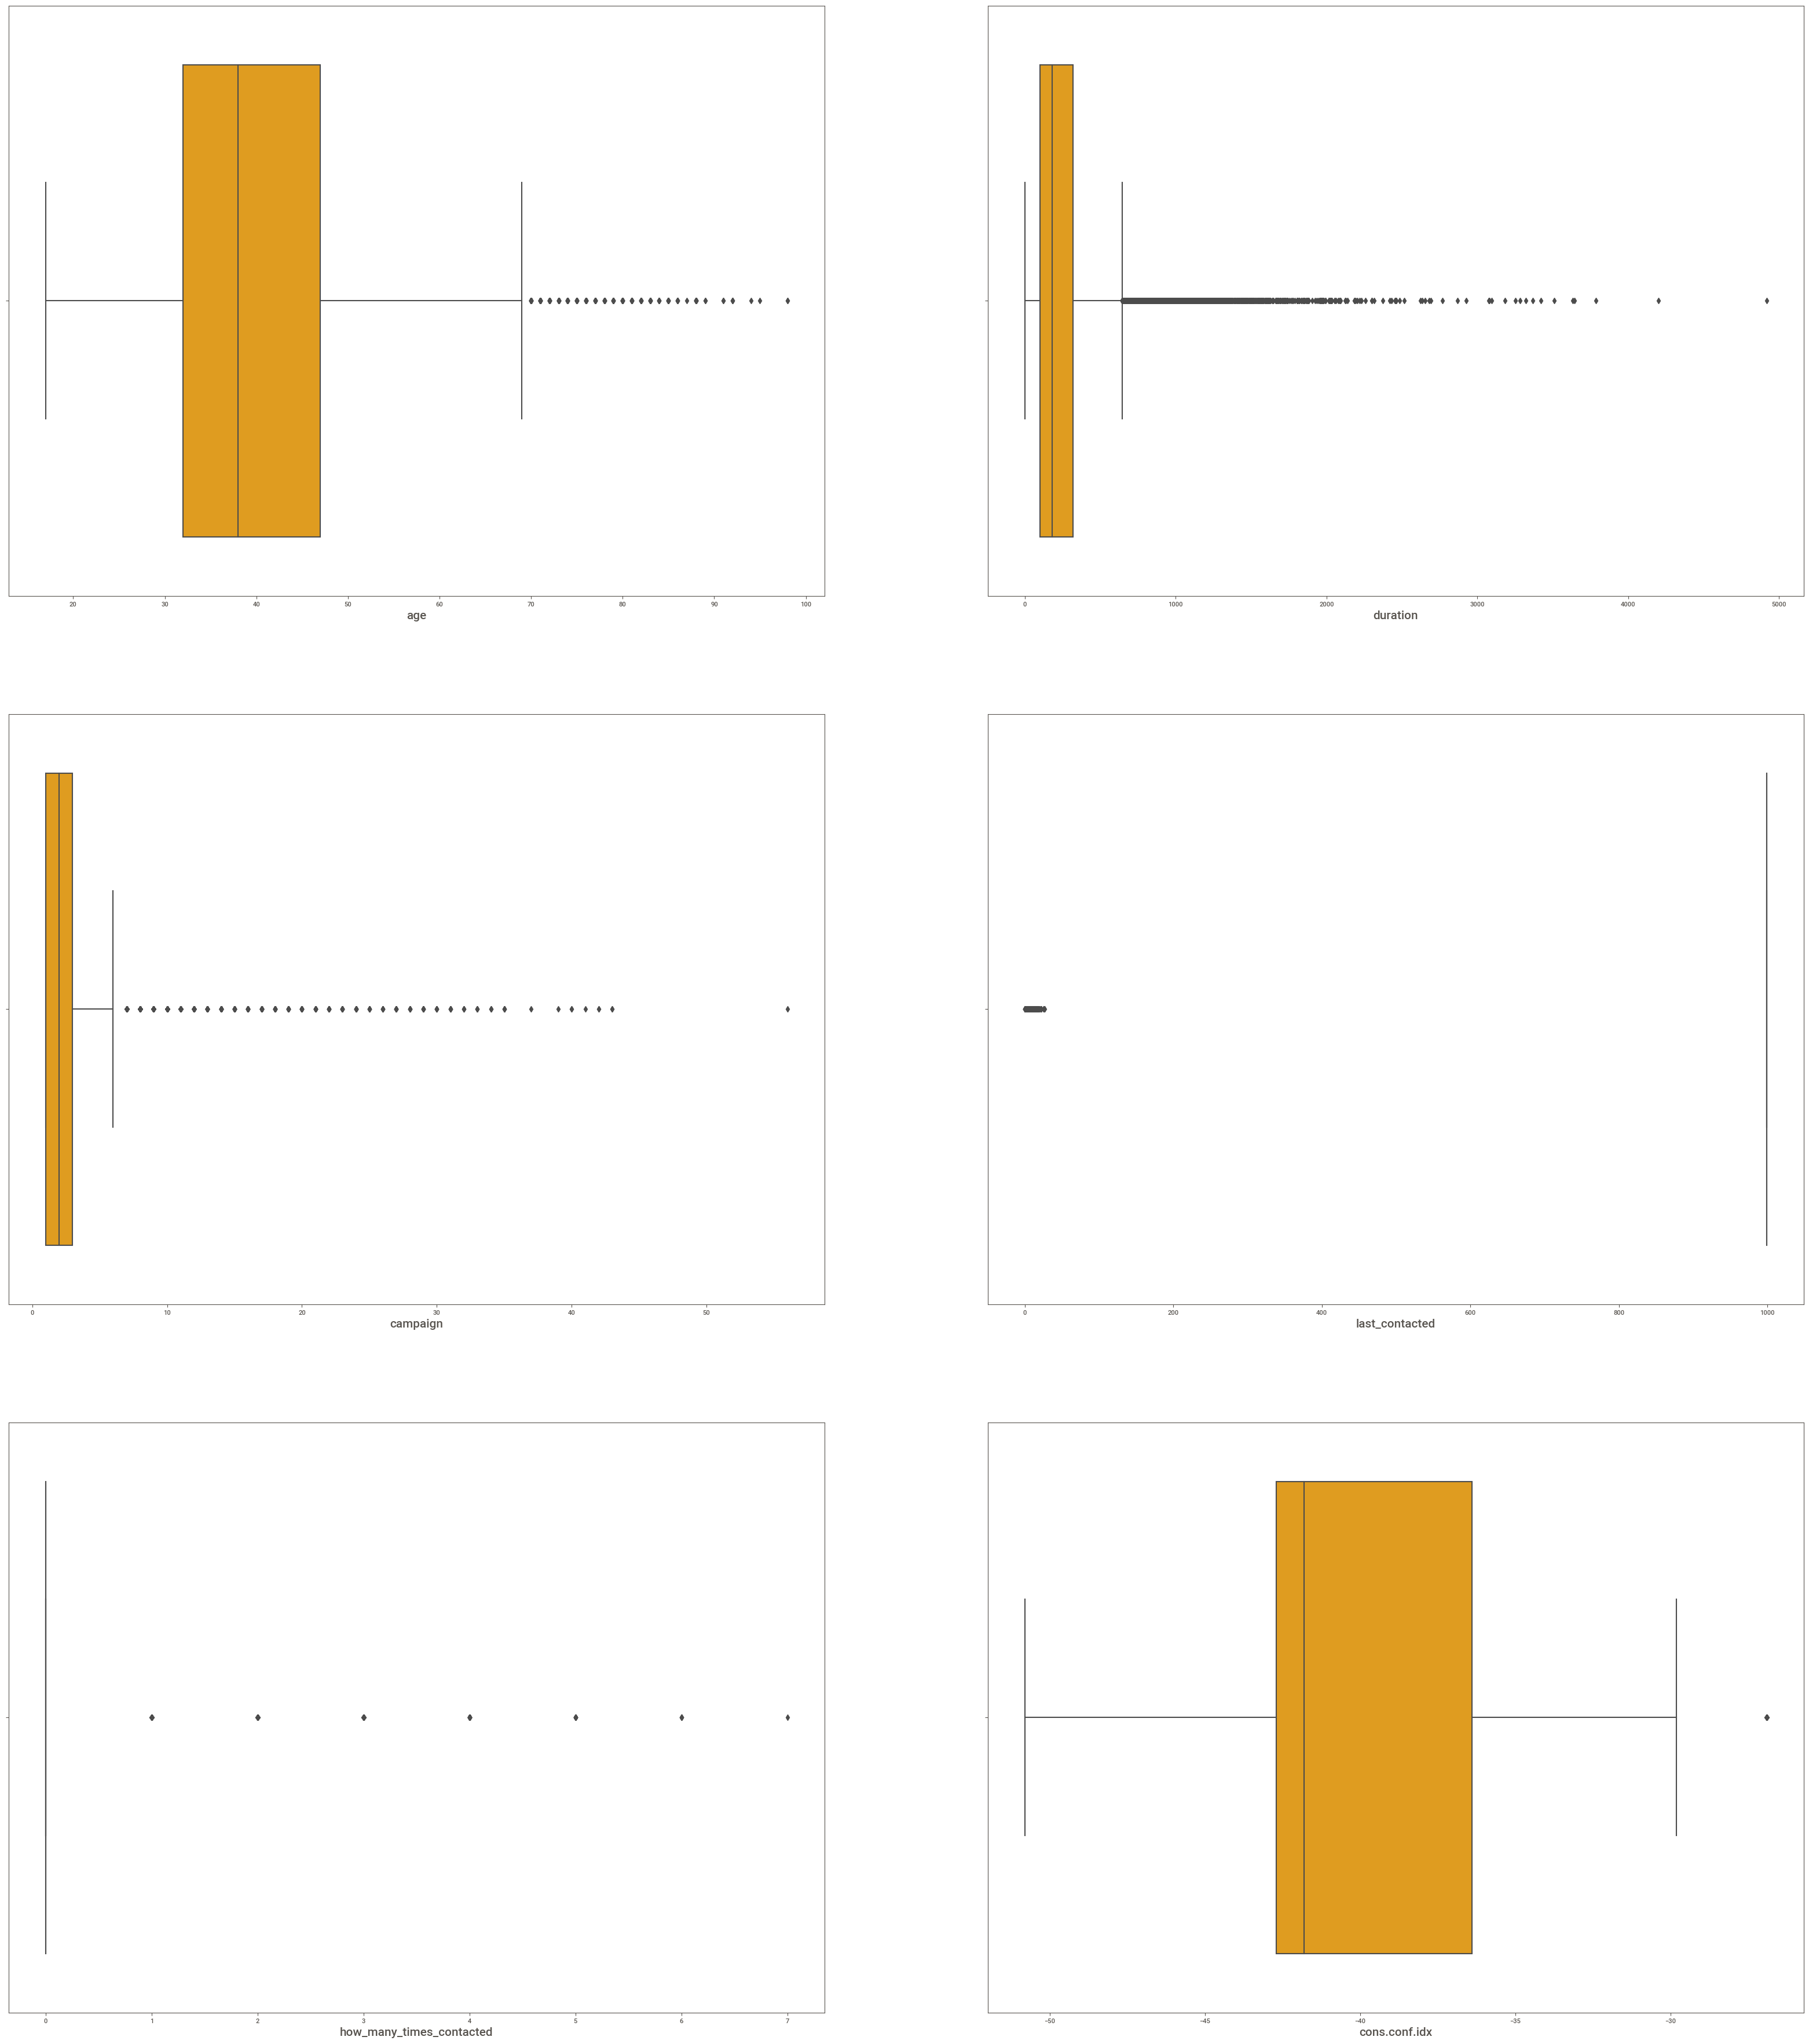

In [28]:

plt.figure(figsize=(40,45),facecolor='white') 
plotno = 1
for column in outlier_columns['column_name']:
    plt.subplot(3,2,plotno) 
    sns.boxplot(x=data[column],color='orange')
    plt.xlabel(column,fontsize=15)
    plotno+=1

plt.show()

When we represented categorical values numerically without addressing outliers, the results were impressive. However, upon attempting to handle the outliers, the outcomes were not favorable.

# Converting Categorical data into Numerical data

In [29]:
cat_data=data.select_dtypes(include=['object']).columns
cat_data

Index(['job', 'marital', 'education', 'default', 'housing', 'personal_loan',
       'communication_means', 'communication_month', 'communication_day',
       'last_call_outcome', 'y'],
      dtype='object')

In [30]:
for x in cat_data:
    print(x,'column')
    print(data[x].unique())
    print('\n')
    print('\n')

job column
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']




marital column
['married' 'single' 'divorced' 'unknown']




education column
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']




default column
['no' 'unknown' 'yes']




housing column
['no' 'yes' 'unknown']




personal_loan column
['no' 'yes' 'unknown']




communication_means column
['telephone' 'cellular']




communication_month column
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']




communication_day column
['mon' 'tue' 'wed' 'thu' 'fri']




last_call_outcome column
['nonexistent' 'failure' 'success']




y column
['no' 'yes']






job column
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin. : 12.972558050278257
blue-collar : 6.894315971471796
technician : 10.826041821147857
services : 8.138070042831947
management : 11.21751025991792
retired : 25.232558139534884
entrepreneur : 8.516483516483516
self-employed : 10.485573539760733
housemaid : 10.0
unemployed : 14.201183431952662
student : 31.428571428571427
unknown : 11.212121212121213


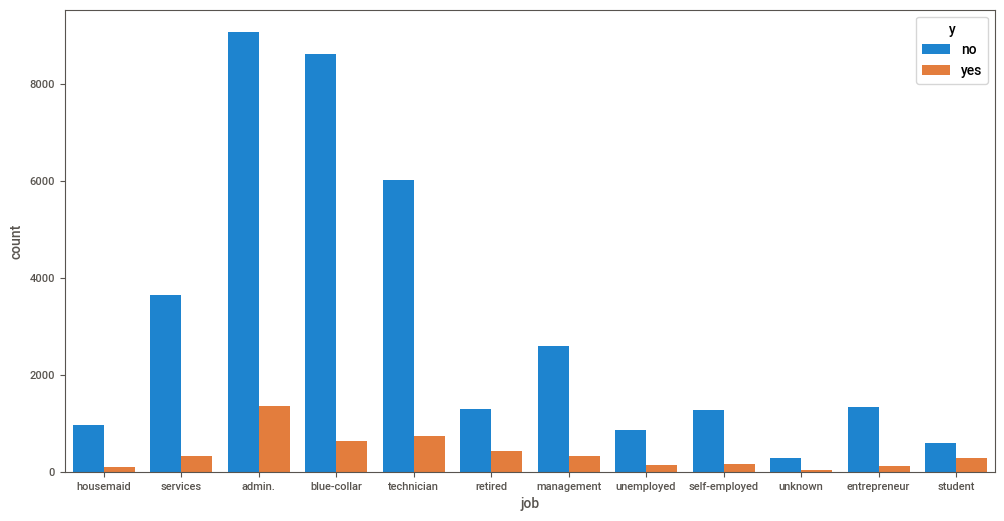




marital column
['married' 'single' 'divorced' 'unknown']
married : 10.157252888318357
single : 14.004149377593361
divorced : 10.320901994796184
unknown : 15.0


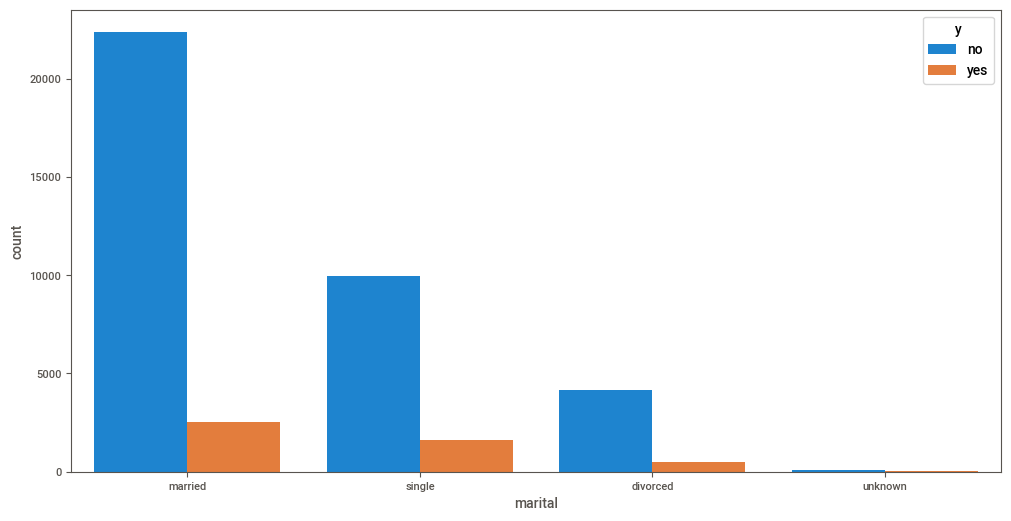




education column
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degree : 13.724523339907956
high.school : 10.835522858644246
basic.9y : 7.82464846980976
professional.course : 11.348464619492656
basic.4y : 10.24904214559387
basic.6y : 8.202443280977313
unknown : 14.500288850375506
illiterate : 22.22222222222222


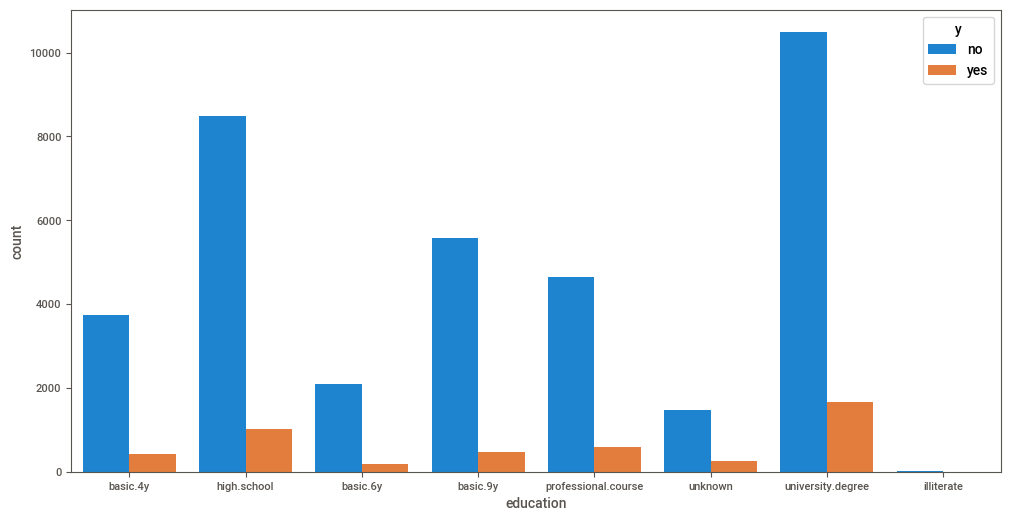




default column
['no' 'unknown' 'yes']
no : 12.878973855406898
unknown : 5.152960335000581
yes : 0.0


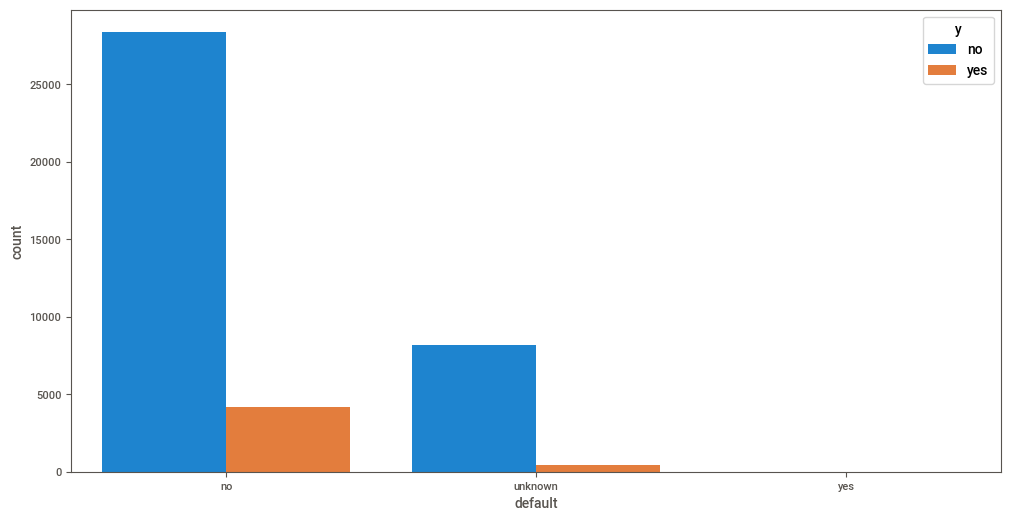




housing column
['no' 'yes' 'unknown']
yes : 11.619391916944753
no : 10.879604768553325
unknown : 10.808080808080808


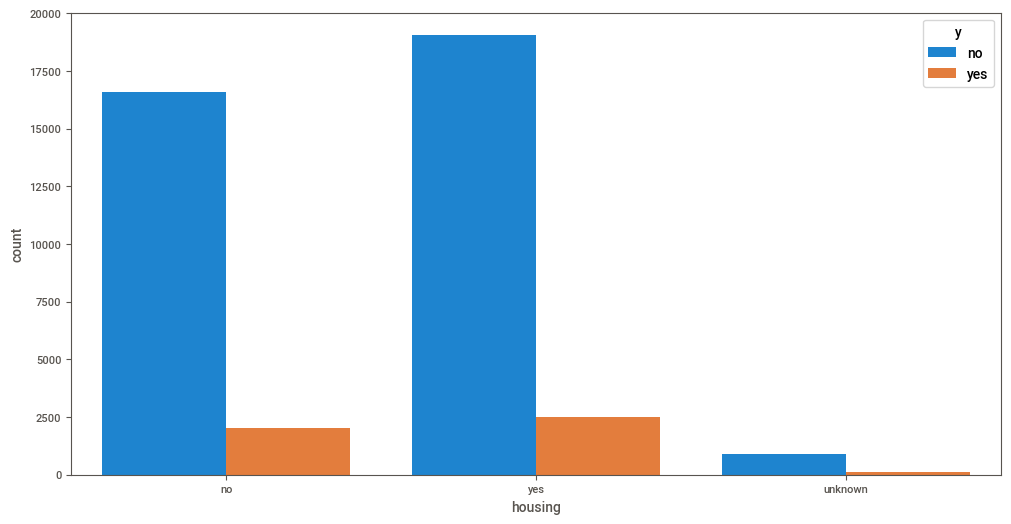




personal_loan column
['no' 'yes' 'unknown']
no : 11.34020618556701
yes : 10.931498079385403
unknown : 10.808080808080808


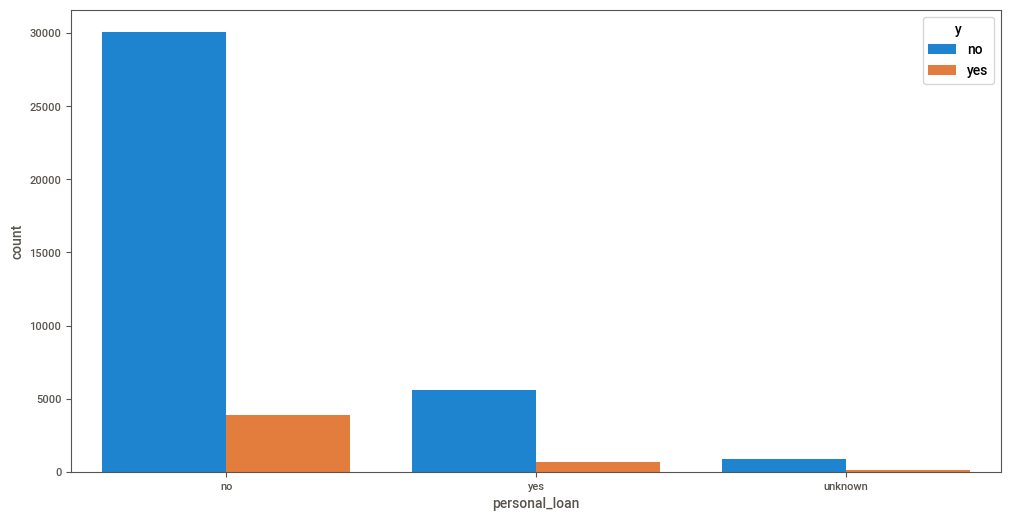




communication_means column
['telephone' 'cellular']
cellular : 14.737607099143206
telephone : 5.231321457059293


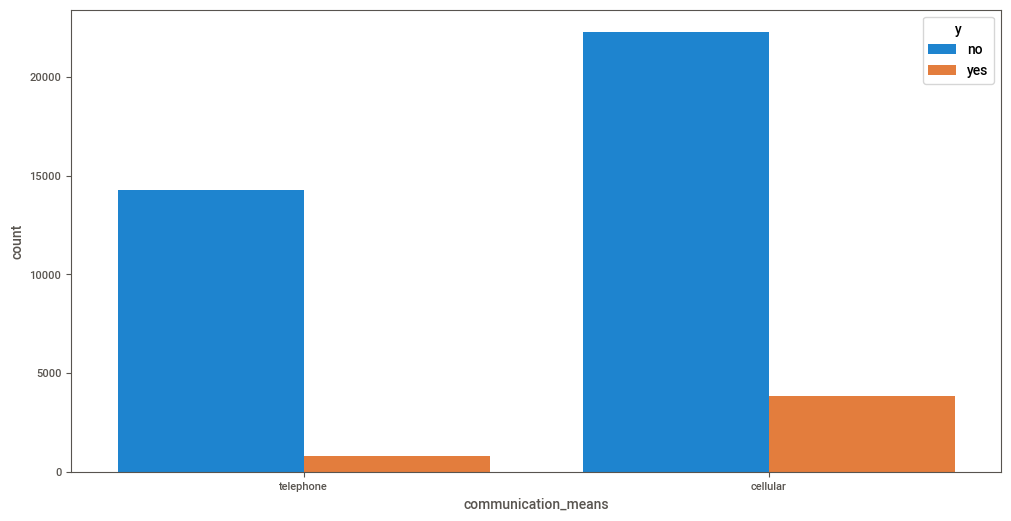




communication_month column
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
may : 6.4347447163918945
jul : 9.046557011430165
aug : 10.60213661379087
jun : 10.511470477623167
nov : 10.14386734942697
apr : 20.47872340425532
oct : 43.871866295264624
sep : 44.91228070175438
mar : 50.54945054945055
dec : 48.9010989010989


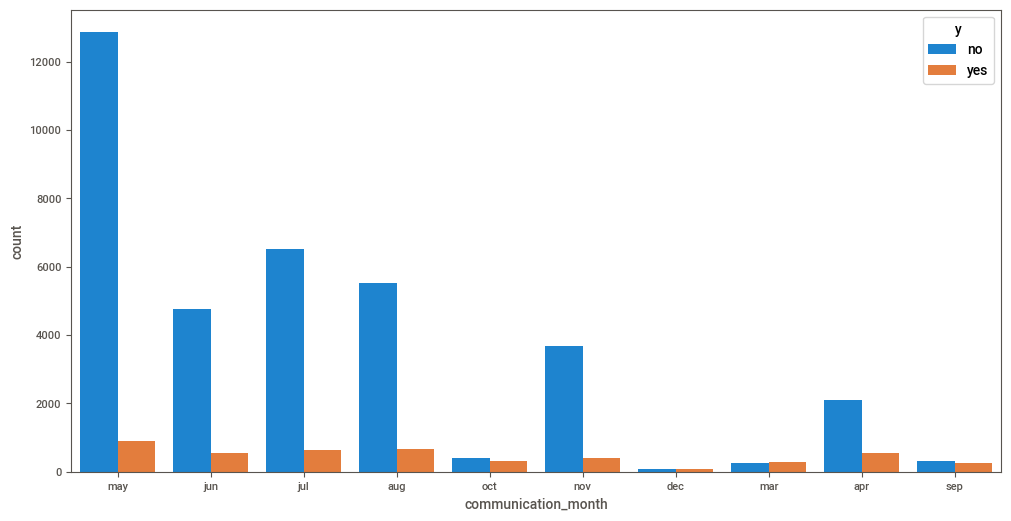




communication_day column
['mon' 'tue' 'wed' 'thu' 'fri']
thu : 12.118752174417256
mon : 9.948320413436692
wed : 11.667076469141874
tue : 11.779975278121137
fri : 10.808738980452281


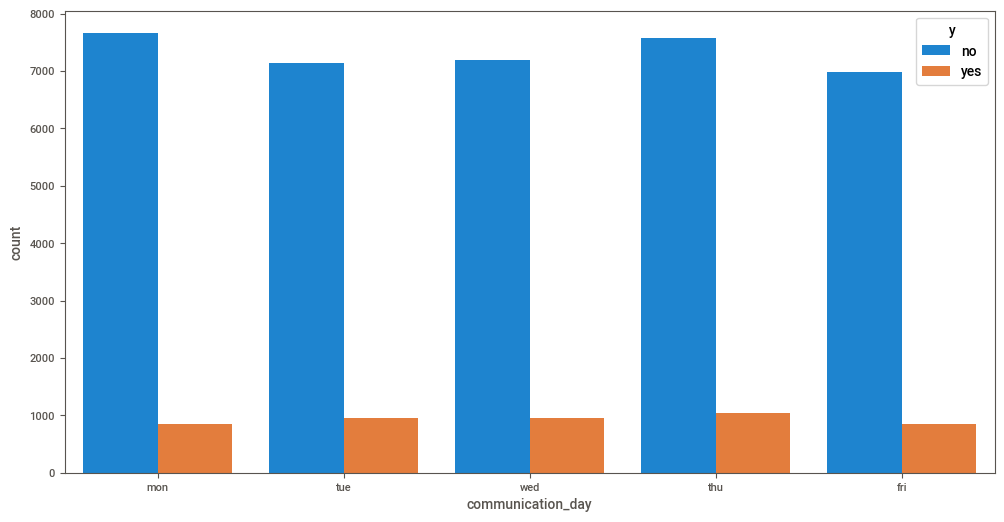




last_call_outcome column
['nonexistent' 'failure' 'success']
nonexistent : 8.83221325534966
failure : 14.22859830667921
success : 65.1128914785142


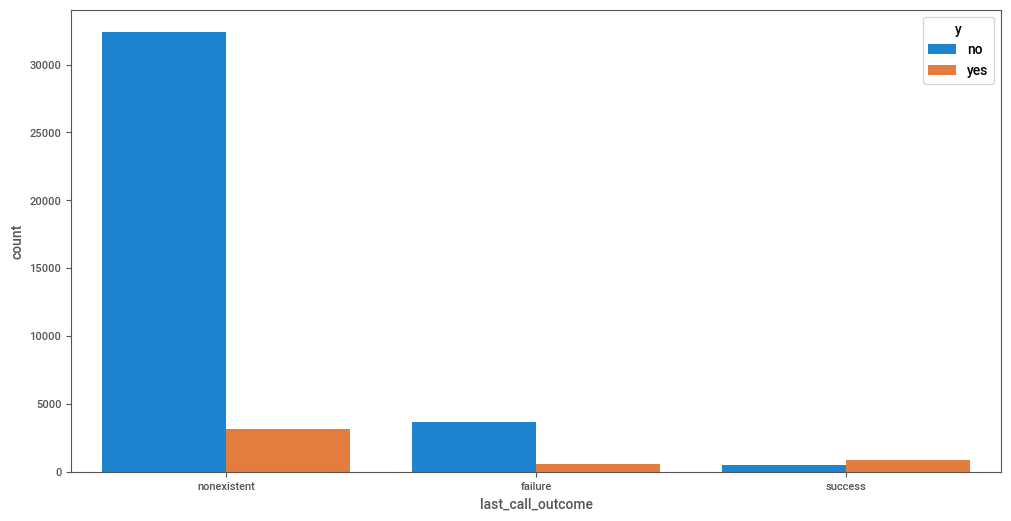




y column
['no' 'yes']
no : 0.0
yes : 100.0


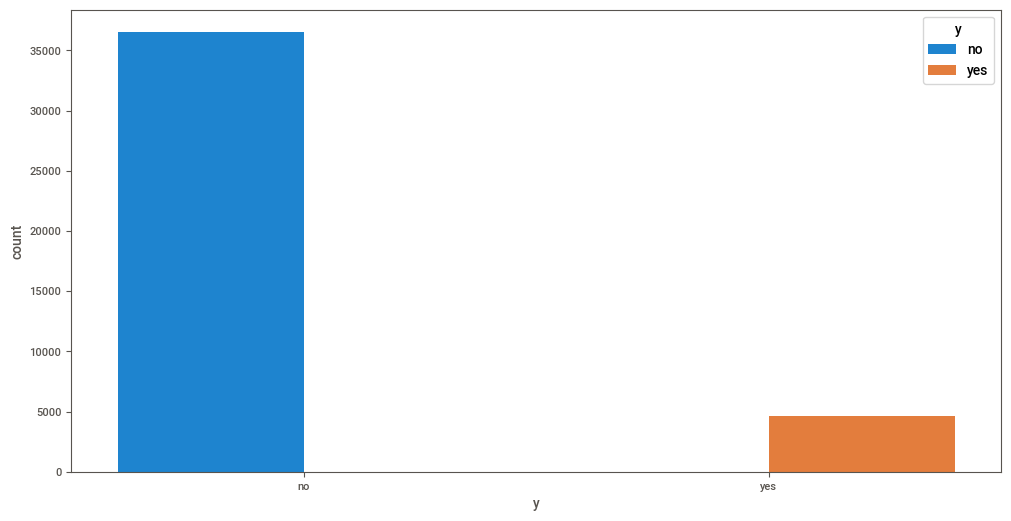

In [31]:
for x in cat_data:
    print(x, 'column')
    print(data[x].unique())
    for z in data[x].value_counts().index:
        subset = data[data[x] == z]
        variable = len(subset[subset['y'] == 'yes'])
        length = len(subset)
        percentage = (variable * 100) / length if length != 0 else 0
        print(z, ":", percentage)
    plt.figure(figsize=(12, 6))
    sns.countplot(x=data[x], hue=data['y'])
    plt.show()
    print('\n\n')

In [32]:
#job

<Axes: xlabel='count', ylabel='job'>

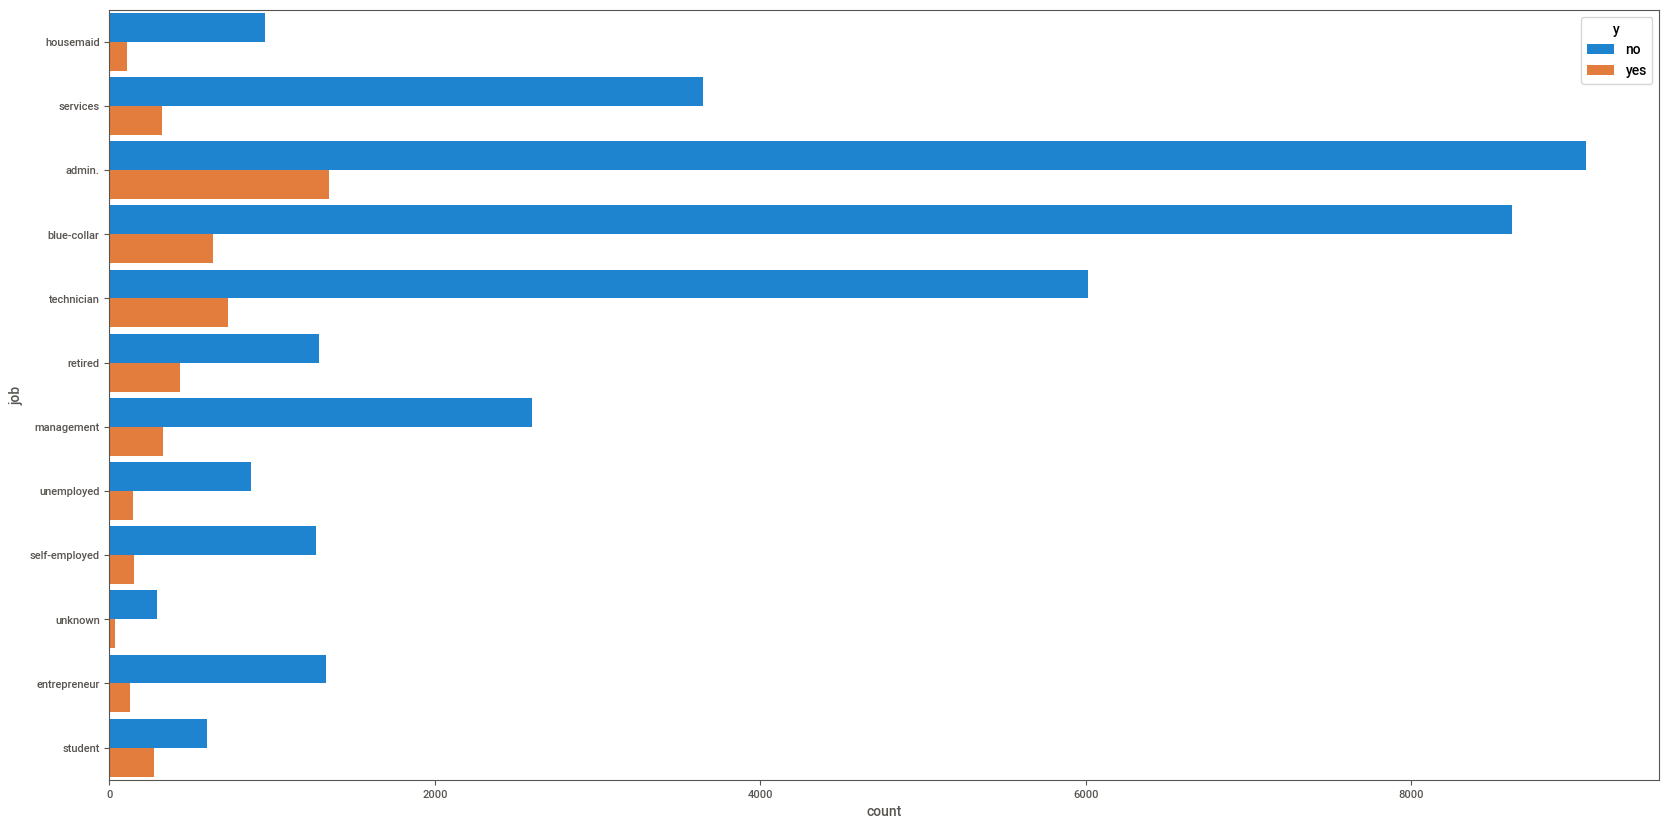

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(y=data['job'],hue=data['y'],width=0.9)

In [34]:
data.job=data.job.map({'admin.':11,'blue-collar':10,'technician':9,'services':8,'management':7,'retired':6,'entrepreneur':5,'self-employed':4,'housemaid':3,'unemployed':2,'student':1,'unknown':0})

In [35]:
# marital

<Axes: xlabel='count', ylabel='marital'>

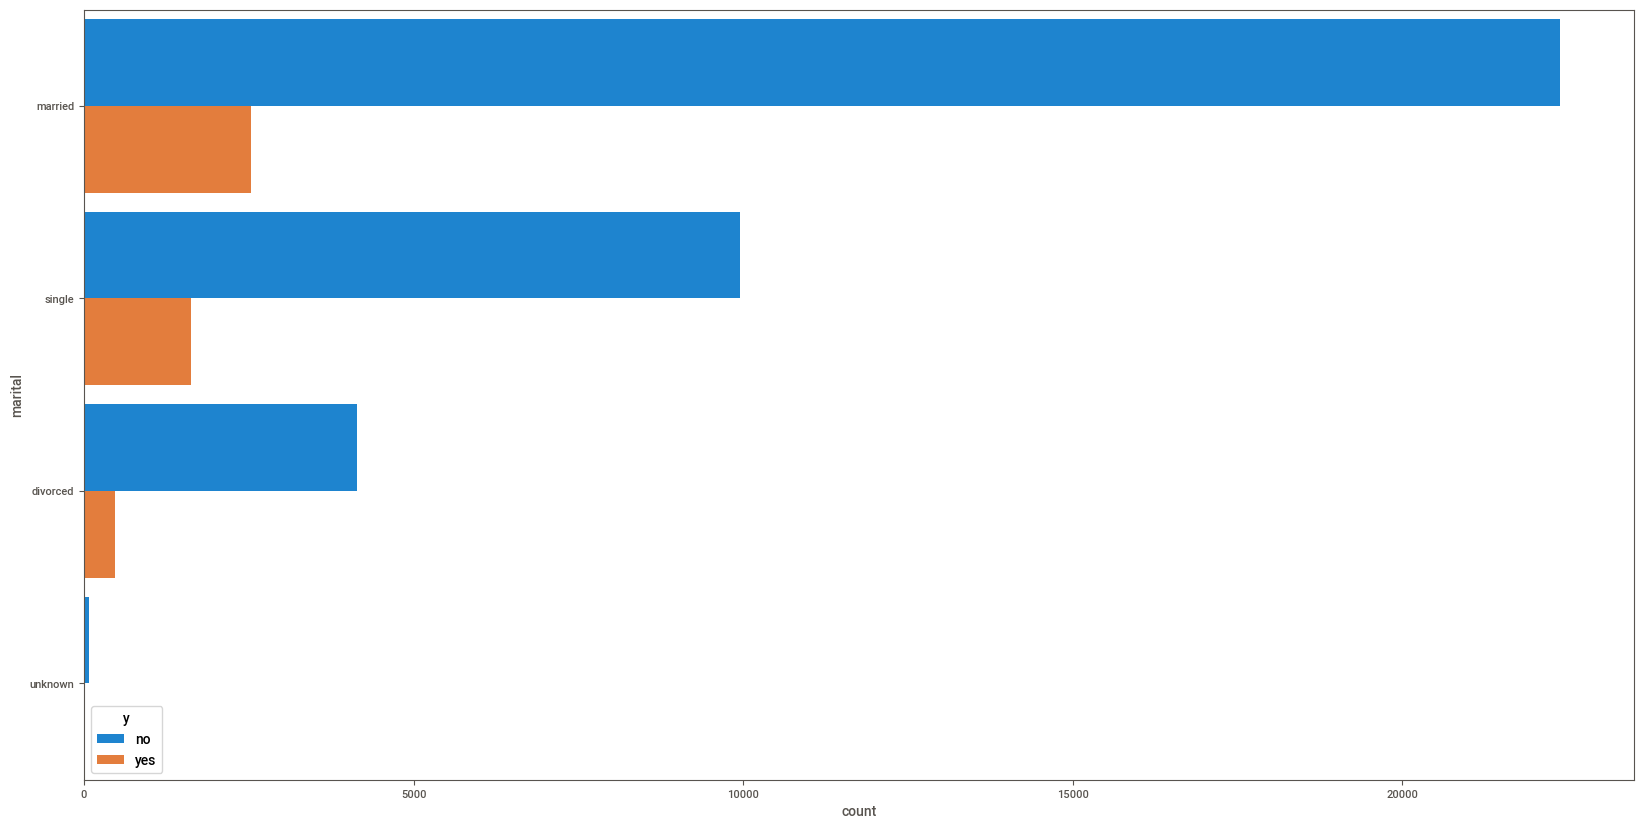

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(y=data['marital'],hue=data['y'],width=0.9)

In [37]:
data.marital=data.marital.map({'married':3,'single':2,'divorced':1,'unknown':0})

In [38]:
# education

<Axes: xlabel='count', ylabel='education'>

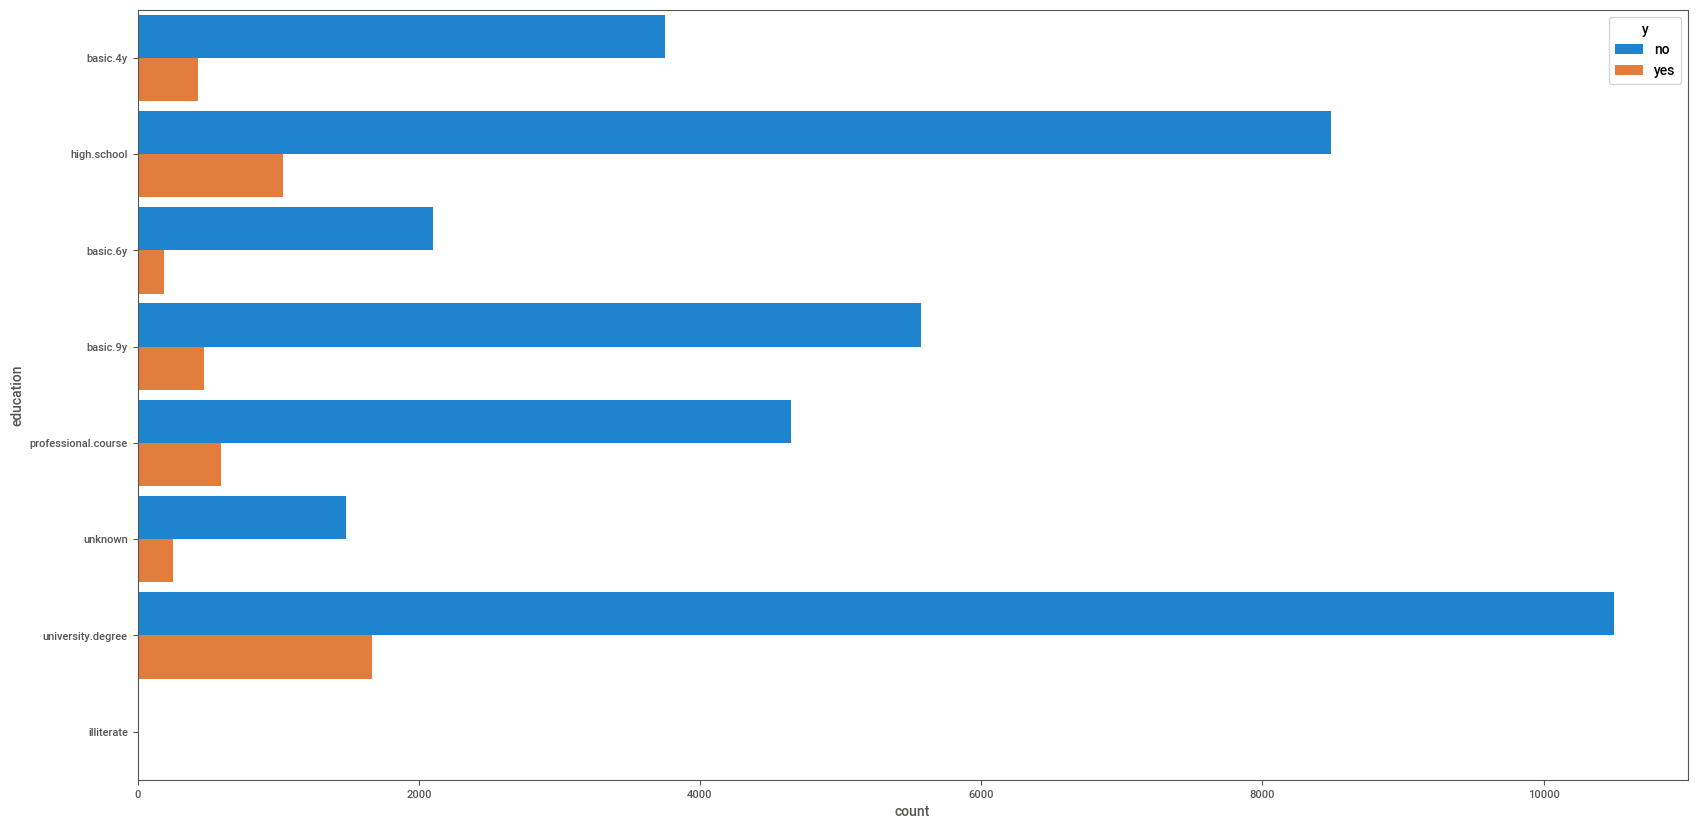

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(y=data['education'],hue=data['y'],width=0.9)

In [40]:
data.education=data.education.map({'university.degree':7,'high.school':6,'basic.9y':5,'professional.course':4,'basic.4y':3,'basic.6y':2,'unknown':1,'illiterate':0})

In [41]:
data.default=data.default.map({'no':2,'unknown':1,'yes':0})

In [42]:
data.housing=data.housing.map({'yes':2,'no':1,'unknown':0})

In [43]:
data.personal_loan =data.personal_loan .map({'no':2,'yes':1,'unknown':0})

In [44]:
data.communication_means=data.communication_means.map({'cellular':1,'telephone':0})

In [45]:
# communication_month

<Axes: xlabel='count', ylabel='communication_month'>

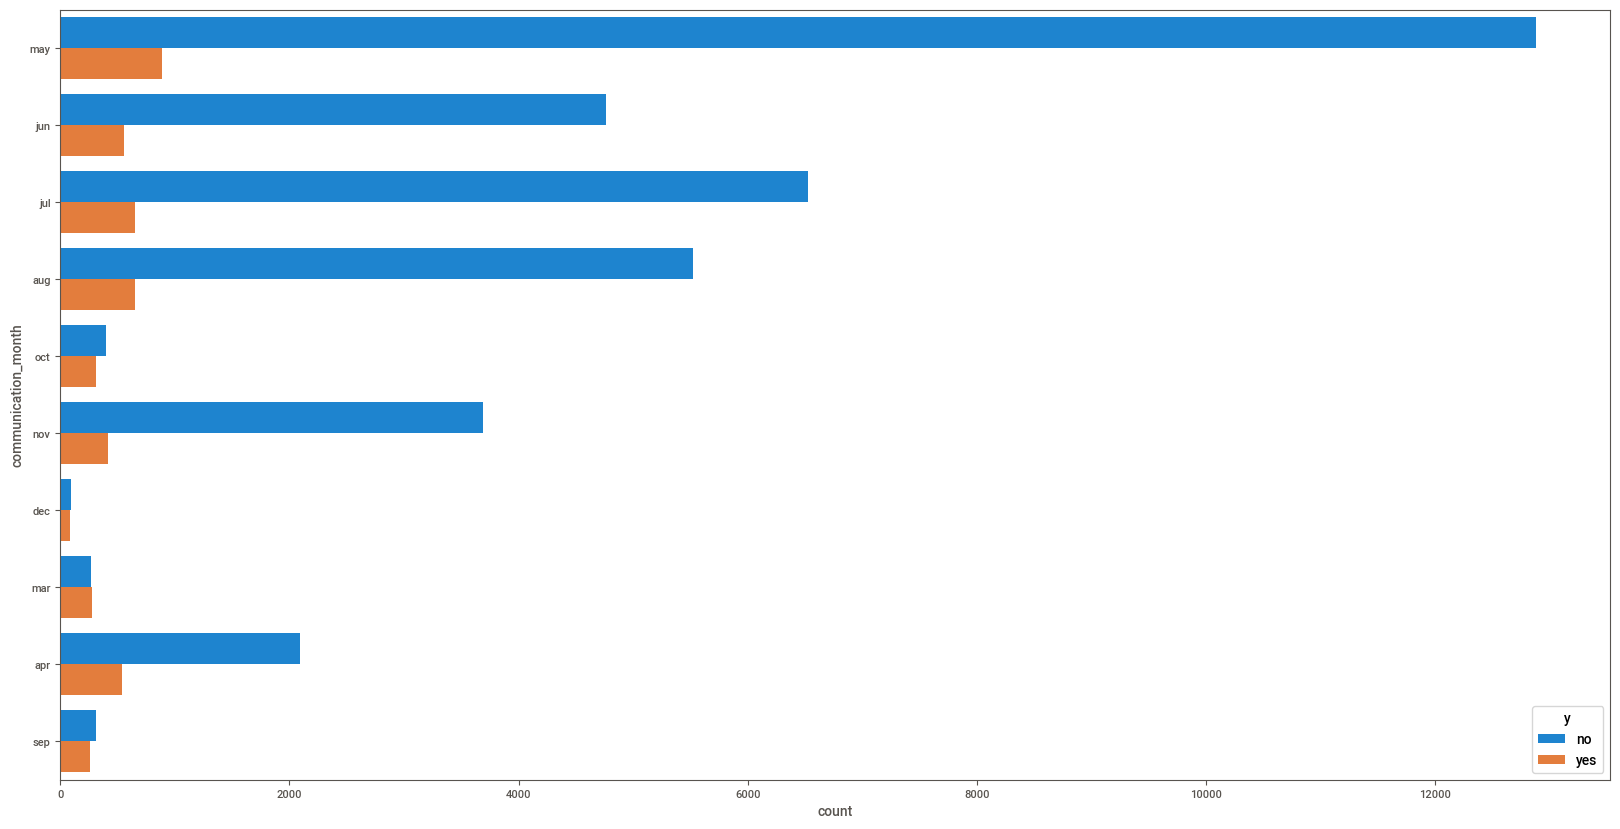

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(y=data['communication_month'],hue=data['y'])

In [47]:
data.communication_month=data.communication_month.map({'may':9,'jul':8,'aug':7,'jun':6,'nov':5,'apr':4,'oct':3,'sep':2,'mar':1,'dec':0})

In [48]:
# communication day

<Axes: xlabel='communication_day', ylabel='count'>

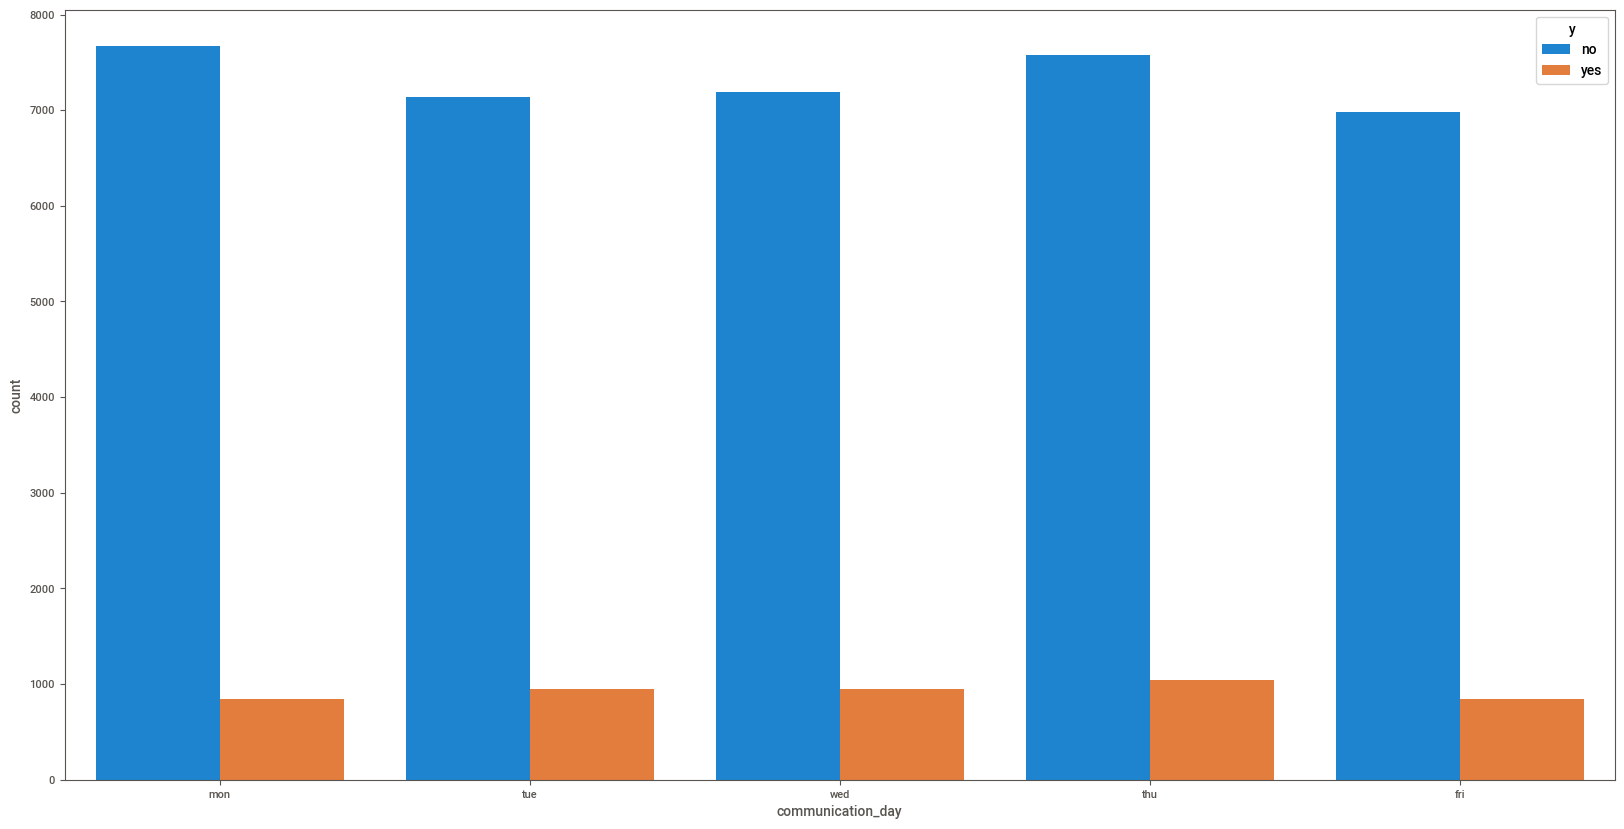

In [49]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['communication_day'],hue=data['y'])

In [50]:
data.communication_day=data.communication_day.map({'thu':4,'mon':3,'wed':2,'tue':1,'fri':0})

In [51]:
data.last_call_outcome=data.last_call_outcome.map({'nonexistent':2,'failure':1,'success':0})

In [52]:
data.y=data.y.map({'no':1,'yes':0})

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       41188 non-null  int64  
 1   job                       41188 non-null  int64  
 2   marital                   41188 non-null  int64  
 3   education                 41188 non-null  int64  
 4   default                   41188 non-null  int64  
 5   housing                   41188 non-null  int64  
 6   personal_loan             41188 non-null  int64  
 7   communication_means       41188 non-null  int64  
 8   communication_month       41188 non-null  int64  
 9   communication_day         41188 non-null  int64  
 10  duration                  41188 non-null  int64  
 11  campaign                  41188 non-null  int64  
 12  last_contacted            41188 non-null  int64  
 13  how_many_times_contacted  41188 non-null  int64  
 14  last_c

# Feature Selection

<Axes: >

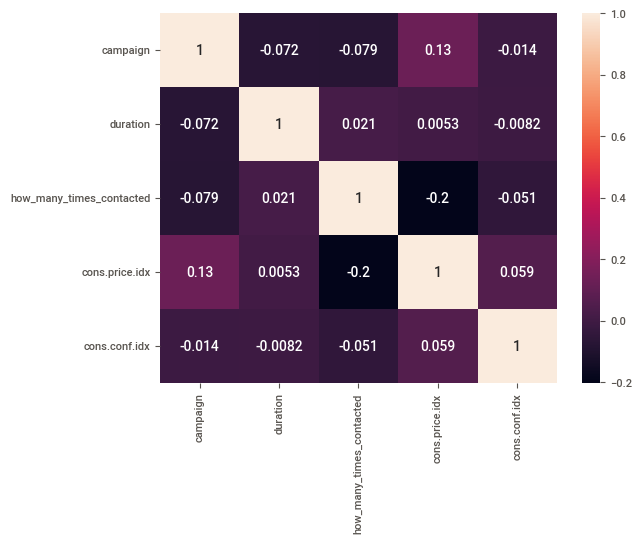

In [54]:
corr_data=data[['campaign','duration','how_many_times_contacted','cons.price.idx','cons.conf.idx']]

sns.heatmap(corr_data.corr(),annot=True)


- Correlation Analysis:
        - From the above heatmap we can conclude that there is no correlation between the features given in the dataset.

# Model Preparation

In [55]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['campaign','duration','how_many_times_contacted','cons.price.idx','cons.conf.idx']]=scale.fit_transform(data[['campaign','duration','how_many_times_contacted','cons.price.idx','cons.conf.idx']])

In [56]:
data

age  job  marital  education  default  housing  personal_loan  \
0       56    3        3          3        2        1              2   
1       57    8        3          6        1        1              2   
2       37    8        3          6        2        2              2   
3       40   11        3          2        2        1              2   
4       56    8        3          6        2        1              1   
...    ...  ...      ...        ...      ...      ...            ...   
41183   73    6        3          4        2        2              2   
41184   46   10        3          4        2        1              2   
41185   56    6        3          7        2        2              2   
41186   44    9        3          4        2        1              2   
41187   74    6        3          4        2        2              2   

       communication_means  communication_month  communication_day  duration  \
0                        0                    9                  3  0.053070   
1                        0                    9                  3  0.030297   
2                        0                    9                  3  0.045954   
3                        0                    9                  3  0.030704   
4                        0                    9                  3  0.062424   
...                    ...                  ...                ...       ...   
41183                    1                    5                  0  0.067914   
41184                    1                    5                  0  0.077877   
41185                    1                    5                  0  0.038430   
41186                    1                    5                  0  0.089874   
41187                    1                    5                  0  0.048597   

       campaign  last_contacted  how_many_times_contacted  last_call_outcome  \
0      0.000000             999                  0.000000                  2   
1      0.000000             999                  0.000000                  2   
2      0.000000             999                  0.000000                  2   
3      0.000000             999                  0.000000                  2   
4      0.000000             999                  0.000000                  2   
...         ...             ...                       ...                ...   
41183  0.000000             999                  0.000000                  2   
41184  0.000000             999                  0.000000                  2   
41185  0.018182             999                  0.000000                  2   
41186  0.000000             999                  0.000000                  2   
41187  0.036364             999                  0.142857                  1   

       emp_var_rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0               1.1        0.698753        0.60251      4.857       5191.0  1  
1               1.1        0.698753        0.60251      4.857       5191.0  1  
2               1.1        0.698753        0.60251      4.857       5191.0  1  
3               1.1        0.698753        0.60251      4.857       5191.0  1  
4               1.1        0.698753        0.60251      4.857       5191.0  1  
...             ...             ...            ...        ...          ... ..  
41183          -1.1        1.000000        0.00000      1.028       4963.6  0  
41184          -1.1        1.000000        0.00000      1.028       4963.6  1  
41185          -1.1        1.000000        0.00000      1.028       4963.6  1  
41186          -1.1        1.000000        0.00000      1.028       4963.6  0  
41187          -1.1        1.000000        0.00000      1.028       4963.6  1  

[41188 rows x 21 columns]

In [57]:
x=data.drop(columns='y')
y=data['y']

In [58]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.25,random_state=47)
print(trainx.shape  ,  trainy.shape)
print(testx.shape  ,   testy.shape)

(30891, 20) (30891,)
(10297, 20) (10297,)


In [59]:
trainy.value_counts()

y
1    27457
0     3434
Name: count, dtype: int64

In [60]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(random_state=47)
print (trainy.value_counts())
trainx_scal,trainy=smt.fit_resample(trainx,trainy)
print(trainy.value_counts())

y
1    27457
0     3434
Name: count, dtype: int64
y
1    27182
0    27182
Name: count, dtype: int64


# model

In [61]:
model_metrics = {
    'model': [],
    'f1_score': [],
    'accuracy': [],    
    'precision': [],
    'recall': [],
    'confusion matrix':[]
   
}


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_auc_score,roc_curve


pipe_lr = Pipeline([('lr', LogisticRegression(random_state=42, n_jobs=-1, max_iter=500))])
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1))])
pipe_knn = Pipeline([('knn', KNeighborsClassifier(n_jobs=-1))])
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state=42, max_features='auto'))])
pipe_bag = Pipeline([('bag', BaggingClassifier(base_estimator=SGDClassifier(random_state=42, n_jobs=-1, max_iter=1500),
                                               n_estimators=100, random_state=42, oob_score=True, n_jobs=-1))])


pipe_sgd = Pipeline([('sgd', SGDClassifier(random_state=42, n_jobs=-1, max_iter=1500))])
pipe_nb = Pipeline([('nb', GaussianNB())])


pipelines = {
    'Logistic Regression': pipe_lr,
    'Random Forest': pipe_rf,
    'KNeighbors Classifier': pipe_knn,
    'Decision Tree': pipe_dt,
    'Bagging Classifier': pipe_bag,
    'SGD Classifier': pipe_sgd,
    'Naive Bayes': pipe_nb
}


for name, pipeline in pipelines.items():
    pipeline.fit(trainx_scal,trainy)
    y_pred = pipeline.predict(testx)
    
    print(f"Metrics for {name}:")
    print('f1_score        ', f1_score(y_pred, testy))
    print('accuracy_score  ', accuracy_score(y_pred, testy))
    print('precision_score ', precision_score(y_pred, testy))
    print('recall_score    ', recall_score(y_pred, testy))
    print("ROC-AUC Score   ", roc_auc_score(y_pred, testy))
    print('classification_report')
    print(classification_report(y_pred, testy))
    print('confusion_matrix')
    print(confusion_matrix(y_pred, testy))
    print("\n")
    model_metrics['model'].append(f'{name} whithout hyperparametric ')
    model_metrics['accuracy'].append( accuracy_score(y_pred, testy).round(2)*100)
    model_metrics['f1_score'].append(f1_score(y_pred, testy).round(2)*100)
    model_metrics['precision'].append(precision_score(y_pred, testy).round(2)*100)
    model_metrics['recall'].append(recall_score(y_pred, testy).round(2)*100)
    model_metrics['confusion matrix'].append(confusion_matrix(y_pred, testy).tolist())
    
    



Metrics for Logistic Regression:
f1_score         0.8498018969864329
accuracy_score   0.7570166067786734
precision_score  0.7785722142778572
recall_score     0.9353772961543544
ROC-AUC Score    0.5990073293958584
classification_report
              precision    recall  f1-score   support

           0       0.59      0.26      0.36      2730
           1       0.78      0.94      0.85      7567

    accuracy                           0.76     10297
   macro avg       0.69      0.60      0.61     10297
weighted avg       0.73      0.76      0.72     10297

confusion_matrix
[[ 717 2013]
 [ 489 7078]]


Metrics for Random Forest:
f1_score         0.9432104291389245
accuracy_score   0.9014276002719238
precision_score  0.927180728192718
recall_score     0.9598041448417217
ROC-AUC Score    0.7614202242360424
classification_report
              precision    recall  f1-score   support

           0       0.71      0.56      0.63      1515
           1       0.93      0.96      0.94      8782



# Hyperparameter tuned 

- Proceeding with hyperparmeter for the top 3 model DecisionTreeClassifier, RandomForestClassifier, KNeighbors.

In [63]:
from sklearn.model_selection import RandomizedSearchCV

param_grids = {
    'KNeighbors': {   
        'knn__n_neighbors': [3, 5, 7],
        'knn__weights': ['uniform', 'distance'],
        'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'knn__leaf_size': [5,10, 20],
        'knn__p': [1, 2]
    },
    'Random Forest': {
        'rf__n_estimators': [50, 100, 200],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 4, 6],
        'rf__min_samples_leaf': [1, 2, 3],
        'rf__max_features': ['auto', 'sqrt', 'log2']
    },
    'Decision Tree': {
        'dt__criterion': ['gini', 'entropy'],
        'dt__splitter': ['best', 'random'],
        'dt__max_depth': [None, 10, 20,22],
        'dt__min_samples_split': [2, 5, 10],
        'dt__min_samples_leaf': [1, 2, 4],
        'dt__max_features': ['auto', 'sqrt', 'log2']
    }
}

pipelines = {
    'KNeighbors': pipe_knn,
    'Random Forest': pipe_rf,
    'Decision Tree': pipe_dt
}

best_params = {}
best_scores = {}

for name, pipeline in pipelines.items():
    random_search = RandomizedSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1, n_iter=10)
    random_search.fit(trainx_scal, trainy)
    best_params[name] = random_search.best_params_
    best_scores[name] = random_search.best_score_

print("Best Parameters for each model:")
for name, params in best_params.items():
    print(f"{name}: {params}")
print("\n")
print("Best Scores for each model:")
for name, score in best_scores.items():
    print(f"{name}: {score}")


Best Parameters for each model:
KNeighbors: {'knn__weights': 'distance', 'knn__p': 1, 'knn__n_neighbors': 5, 'knn__leaf_size': 20, 'knn__algorithm': 'brute'}
Random Forest: {'rf__n_estimators': 100, 'rf__min_samples_split': 4, 'rf__min_samples_leaf': 1, 'rf__max_features': 'log2', 'rf__max_depth': 20}
Decision Tree: {'dt__splitter': 'best', 'dt__min_samples_split': 5, 'dt__min_samples_leaf': 1, 'dt__max_features': 'log2', 'dt__max_depth': 20, 'dt__criterion': 'gini'}


Best Scores for each model:
KNeighbors: 0.9125341228080683
Random Forest: 0.9457546699275406
Decision Tree: 0.9162683086625861


In [ ]:
# DecisionTreeClassifier

In [75]:
dtree_m=DecisionTreeClassifier(criterion='gini',max_depth=23,max_features='log2',min_samples_leaf=1,min_samples_split=2,splitter='best',random_state=37)
dtree_m.fit(trainx_scal,trainy)
y_pred=dtree_m.predict(testx)


print('f1_score        ', f1_score(y_pred, testy))
print('accuracy_score  ', accuracy_score(y_pred, testy))
print('precision_score ', precision_score(y_pred, testy))
print('recall_score    ', recall_score(y_pred, testy))
print("ROC-AUC Score   ", roc_auc_score(y_pred, testy))
print('classification_report')
print(classification_report(y_pred, testy))
print('confusion_matrix')
print(confusion_matrix(y_pred, testy))
print("\n")
model_metrics['model'].append('DecisionTreeClassifier  hyperparametric tuned')
model_metrics['accuracy'].append( accuracy_score(y_pred, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(y_pred, testy).round(2)*100)
model_metrics['precision'].append(precision_score(y_pred, testy).round(2)*100)
model_metrics['recall'].append(recall_score(y_pred, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(y_pred, testy).tolist())

f1_score         0.9277693983576336
accuracy_score   0.8744294454695543
precision_score  0.9134308656913431
recall_score     0.9425652667423382
ROC-AUC Score    0.7066558680719088
classification_report
              precision    recall  f1-score   support

           0       0.58      0.47      0.52      1487
           1       0.91      0.94      0.93      8810

    accuracy                           0.87     10297
   macro avg       0.75      0.71      0.72     10297
weighted avg       0.87      0.87      0.87     10297

confusion_matrix
[[ 700  787]
 [ 506 8304]]




In [76]:
# RandomForestClassifier

In [87]:
rforest_m=RandomForestClassifier(n_estimators=100, min_samples_split=4, min_samples_leaf=1,
                                      max_features="log2", max_depth=20,random_state=10)
rforest_m.fit(trainx_scal,trainy)
y_pred=rforest_m.predict(testx)


print('f1_score        ', f1_score(y_pred, testy))
print('accuracy_score  ', accuracy_score(y_pred, testy))
print('precision_score ', precision_score(y_pred, testy))
print('recall_score    ', recall_score(y_pred, testy))
print("ROC-AUC Score   ", roc_auc_score(y_pred, testy))
print('classification_report')
print(classification_report(y_pred, testy))
print('confusion_matrix')
print(confusion_matrix(y_pred, testy))
print("\n")
model_metrics['model'].append('RandomForestClassifier  hyperparametric tuned')
model_metrics['accuracy'].append( accuracy_score(y_pred, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(y_pred, testy).round(2)*100)
model_metrics['precision'].append(precision_score(y_pred, testy).round(2)*100)
model_metrics['recall'].append(recall_score(y_pred, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(y_pred, testy).tolist())

f1_score         0.9432231358729093
accuracy_score   0.9014276002719238
precision_score  0.92740072599274
recall_score     0.9595948099248804
ROC-AUC Score    0.7613989933145249
classification_report
              precision    recall  f1-score   support

           0       0.71      0.56      0.63      1511
           1       0.93      0.96      0.94      8786

    accuracy                           0.90     10297
   macro avg       0.82      0.76      0.78     10297
weighted avg       0.89      0.90      0.90     10297

confusion_matrix
[[ 851  660]
 [ 355 8431]]




In [89]:
# KNeighborsClassifier

In [88]:
knn=KNeighborsClassifier(algorithm = 'brute',  leaf_size = 20, n_neighbors = 5, p = 1, weights = 'distance')
knn.fit(trainx_scal,trainy)
y_pred=knn.predict(testx)


print('f1_score        ', f1_score(y_pred, testy))
print('accuracy_score  ', accuracy_score(y_pred, testy))
print('precision_score ', precision_score(y_pred, testy))
print('recall_score    ', recall_score(y_pred, testy))
print("ROC-AUC Score   ", roc_auc_score(y_pred, testy))
print('classification_report')
print(classification_report(y_pred, testy))
print('confusion_matrix')
print(confusion_matrix(y_pred, testy))
print("\n")
model_metrics['model'].append('KNeighborsClassifier  hyperparametric tuned')
model_metrics['accuracy'].append( accuracy_score(y_pred, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(y_pred, testy).round(2)*100)
model_metrics['precision'].append(precision_score(y_pred, testy).round(2)*100)
model_metrics['recall'].append(recall_score(y_pred, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(y_pred, testy).tolist())

f1_score         0.8877269593196967
accuracy_score   0.8102359910653588
precision_score  0.8497415025849742
recall_score     0.9292674124864669
ROC-AUC Score    0.620379673985169
classification_report
              precision    recall  f1-score   support

           0       0.51      0.31      0.39      1984
           1       0.85      0.93      0.89      8313

    accuracy                           0.81     10297
   macro avg       0.68      0.62      0.64     10297
weighted avg       0.78      0.81      0.79     10297

confusion_matrix
[[ 618 1366]
 [ 588 7725]]




# Model Comparision

In [90]:
model_metrics_df=pd.DataFrame(model_metrics)
model_metrics_df.set_index('model',inplace=True)
model_metrics_df.sort_values(by='precision',ascending=False)

f1_score  accuracy  \
model                                                                 
Random Forest whithout hyperparametric               94.0      90.0   
RandomForestClassifier  hyperparametric tuned        94.0      90.0   
Decision Tree whithout hyperparametric               93.0      88.0   
DecisionTreeClassifier  hyperparametric tuned        93.0      87.0   
KNeighborsClassifier  hyperparametric tuned          89.0      81.0   
KNeighbors Classifier whithout hyperparametric       88.0      79.0   
Naive Bayes whithout hyperparametric                 88.0      81.0   
Logistic Regression whithout hyperparametric         85.0      76.0   
Bagging Classifier whithout hyperparametric          83.0      73.0   
SGD Classifier whithout hyperparametric              62.0      51.0   

                                                 precision  recall  \
model                                                                
Random Forest whithout hyperparametric                93.0    96.0   
RandomForestClassifier  hyperparametric tuned         93.0    96.0   
Decision Tree whithout hyperparametric                92.0    95.0   
DecisionTreeClassifier  hyperparametric tuned         91.0    94.0   
KNeighborsClassifier  hyperparametric tuned           85.0    93.0   
KNeighbors Classifier whithout hyperparametric        82.0    94.0   
Naive Bayes whithout hyperparametric                  82.0    95.0   
Logistic Regression whithout hyperparametric          78.0    94.0   
Bagging Classifier whithout hyperparametric           74.0    95.0   
SGD Classifier whithout hyperparametric               46.0    95.0   

                                                           confusion matrix  
model                                                                        
Random Forest whithout hyperparametric            [[853, 662], [353, 8429]]  
RandomForestClassifier  hyperparametric tuned     [[851, 660], [355, 8431]]  
Decision Tree whithout hyperparametric            [[734, 768], [472, 8323]]  
DecisionTreeClassifier  hyperparametric tuned     [[700, 787], [506, 8304]]  
KNeighborsClassifier  hyperparametric tuned      [[618, 1366], [588, 7725]]  
KNeighbors Classifier whithout hyperparametric   [[705, 1618], [501, 7473]]  
Naive Bayes whithout hyperparametric             [[852, 1598], [354, 7493]]  
Logistic Regression whithout hyperparametric     [[717, 2013], [489, 7078]]  
Bagging Classifier whithout hyperparametric      [[824, 2401], [382, 6690]]  
SGD Classifier whithout hyperparametric          [[999, 4870], [207, 4221]]

# Conclusion

- It's evident that Random Forest and Decision Tree models perform relatively well, especially after hyperparameter tuning. Naive Bayes, Logistic Regression, and Bagging Classifier also show promising results. However, the SGD Classifier seems to struggle significantly compared to other models.

# Challenges Faced

### Too Many Categorical Values:
One significant challenge was the presence of numerous unique values in some categorical features. Handling these high cardinality features efficiently was crucial to avoid issues like overfitting and excessive dimensionality.

### Avoiding One-Hot Encoding:
Given the high cardinality, using one-hot encoding would have significantly increased the number of columns, making the dataset more sparse and computationally expensive to process. Alternative encoding techniques like target encoding or frequency encoding were considered to address this challenge.

### Ignoring Outliers:
Outliers in the dataset were initially ignored to streamline the process and achieve adequate results. This decision was made to simplify the model building process, though it comes with the trade-off of potentially reduced model accuracy.

### Time-Consuming Hyperparameter Tuning:
Optimizing hyperparameters was a time-intensive process. Extensive grid search and cross-validation were required to find the best parameters for each model, which was computationally demanding but essential for improving model performance.

### Class Imbalance:
Dealing with class imbalance can affect the performance of the models, requiring techniques like oversampling, undersampling, or using different evaluation metrics.

### Feature Engineering:
Selecting relevant features and transforming them appropriately can greatly impact model performance.

### Interpretability:
Some models may be inherently less interpretable, making it challenging to understand the reasons behind their predictions.
